# Thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import pickle

In [3]:
%matplotlib inline

# Mô tả bộ dữ liệu
- **BAD**:
  - 1: Người nộp đơn đã vỡ nợ hoặc nợ quá hạn nghiêm trọng
  - 0: Người nộp đơn đã thanh toán khoản vay
- **LOAN**: Số tiền yêu cầu vay
- **MORTDUE**: Số tiền nợ còn lại trên khoản thế chấp hiện tại
- **VALUE**: Giá trị tài sản hiện tại
- **REASON**: Lý do vay
  - DebtCon: Debt consolidation (ghép nợ)
  - HomeImp: Home improvement (sửa sang nhà cửa)
- **JOB**: Loại công việc, bao gồm các nhóm:
  - "Office"
  - "Sales"
  - "Manager"
  - "Professional Executive"
  - "Other"
- **YOJ**: Số năm làm việc tại công việc hiện tại
- **DEROG**: Số lượng báo cáo vỡ nợ
- **DELINQ**: Số hạn mức tín dụng quá hạn
- **CLAGE**: Tuổi của hạn mức tín dụng lâu nhất tính theo tháng
- **NINQ**: Số lượng yêu cầu tín dụng gần đây
- **CLNO**: Số lượng hạn mức tín dụng
- **DEBTINC**: Tỷ lệ nợ/thu nhập

# Đọc dữ liệu

In [4]:
df = pd.read_csv("G:\\APACHE_AIRFLOW\\data\\hmeq.csv")
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [5]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Bộ dữ liệu gồm 13 cột và 5960 hàng, trong đó:
- BAD là biến mục tiêu để xác định xem khách hàng có vỡ nợ hay không.
- Các trường phân loại bao gồm: JOB, REASON. (2)
- Các trường kiểu số: LOAN, MORTDUE, VALUE, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC. (10)
- Các trường bị thiếu dữ liệu: MORTDUE, VALUE,REASON, JOB, YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO, DEBTINC.(11)

In [7]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Nhận xét:
- Trường BAD có giá trị trung bình là 0.2
- Trường LOAN biểu diễn số tiền khách hàng yêu cầu vay có giá trị trung bình 18.608
- Trường MORTDUE mô tả số tiền nợ còn lại trên khoản thế chấp còn lại có giá trị trung bình là 73760.82.
- Trường VALUE biểu thị giá trị tài sản hiện tại của khách hàng có giá trị trung bình là 101776
- Trường YOJ biểu diễn số năm kinh nghiệm trong công việc khách hàng, trung bình mỗi khách hàng có 8.92 năm kinh nghiệm
- Trường DEROG mô tả số lượng báo cáo vỡ nợ, trung bình mỗi khách hàng có khoảng 0.25 báo cáo vỡ nợ
- Trường DELINQ biểu thị số hạn mức tín dụng quá hạn, trung bình có 0.45 hạn mức tín dụng quá hạn
- Trường CLAGE mô tả tuổi của hạn mức tín dụng lâu nhất, có giá trị trung bình là 179.76 tháng
- Trường NINQ biểu diễn số lượng yêu cầu tín dụng gần đây, trung bình có khoảng 1.2 yêu cầu tín dụng gần nhất
- Trường CLNO biểu diễn số lượng hạn mức tín dụng trong lịch sử khách hàng, trung bình lượng hạn mức tín dụng trong lịch sử khách hàng là khoảng 21.3
- Trường DEBTINCE biểu thị tỷ lệ nợ trên thu nhập khách hàng với giá trị trung bình là 33.79

In [ ]:
df['JOB'].value_counts()

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

Trường JOB mô tả nghề nghiệp của khách hàng, gồm 6 kiểu công việc: Sales, Self, Mgr, Office, ProfExe, Other. Trong đó chiếm số lượng đông đảo nhất là ProfExe.

In [ ]:
df['REASON'].value_counts()

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64

Trường Reason là lý do vay tiền, gồm 2 lý do chính: DebtCon và HomeImp trong đó DebtCon chiếm đa số trong bộ dữ liệu với 3928 bản ghi.


# Chia dữ liệu thành 2 tập train và test

In [8]:
X = df.drop(['BAD'],axis=1)  # x là các biến quan sát, lược bỏ cột BAD
y = df['BAD'] # các giá trị cột BAD là biến mục tiêu
x_train, x_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42, test_size=0.2)

In [ ]:
print("Train:",x_train.shape)
print("Test:",x_test.shape)

Train: (4768, 12)
Test: (1192, 12)


In [ ]:
y_train.value_counts()

BAD
0    3817
1     951
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

BAD
0    954
1    238
Name: count, dtype: int64

# Đánh giá phân bố bộ dữ liệu

In [ ]:
def distribution_numerical_type(column):
    plt.figure(figsize=(10, 6))

    # Vẽ histogram cho tập train
    sns.histplot(x_train[column], bins=10, kde=True, color='blue', label='Train', stat='density')
    skew_train = x_train[column].skew()
    plt.text(0.95, 0.85, f"Skewness (Train): {skew_train:.2f}", transform=plt.gca().transAxes,
             horizontalalignment='right', fontsize=12, color='blue')

    # Vẽ histogram cho tập test
    sns.histplot(x_test[column], bins=10, kde=True, color='red', label='Test', stat='density')
    skew_test = x_test[column].skew()
    plt.text(0.95, 0.80, f"Skewness (Test): {skew_test:.2f}", transform=plt.gca().transAxes,
             horizontalalignment='right', fontsize=12, color='red')

    plt.xlabel(column)
    plt.ylabel('Mật độ')
    plt.legend(loc='upper right')

    plt.show()

In [ ]:
def distribution_categorical_type(column, train_data, test_data):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    # Vẽ biểu đồ bar plot cho tập train
    train_counts = train_data.value_counts(normalize=True)
    train_counts_absolute = train_data.value_counts()
    sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
    axes[0].set_title(f"Phân phối của {column} trên tập train")
    axes[0].set_ylabel("Tần suất (Normalized)")
    axes[0].set_xlabel(column)
    for p, count in zip(axes[0].patches, train_counts_absolute):
        axes[0].annotate(f"{p.get_height():.2f}\n({count})",
                         (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                         ha='center', va='center',
                         xytext=(0, 10), textcoords='offset points', color='black', fontsize=12)

    # Vẽ biểu đồ bar plot cho tập test
    test_counts = test_data.value_counts(normalize=True)
    test_counts_absolute = test_data.value_counts()
    sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')
    axes[1].set_title(f"Phân phối của {column} trên tập test")
    axes[1].set_ylabel("Tần suất (Normalized)")
    axes[1].set_xlabel(column)
    for p, count in zip(axes[1].patches, test_counts_absolute):
        axes[1].annotate(f"{p.get_height():.2f}\n({count})",
                         (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                         ha='center', va='center',
                         xytext=(0, 10), textcoords='offset points', color='black', fontsize=12)

    plt.tight_layout()
    plt.show()

<ipython-input-18-3622173a1db2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
<ipython-input-18-3622173a1db2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')


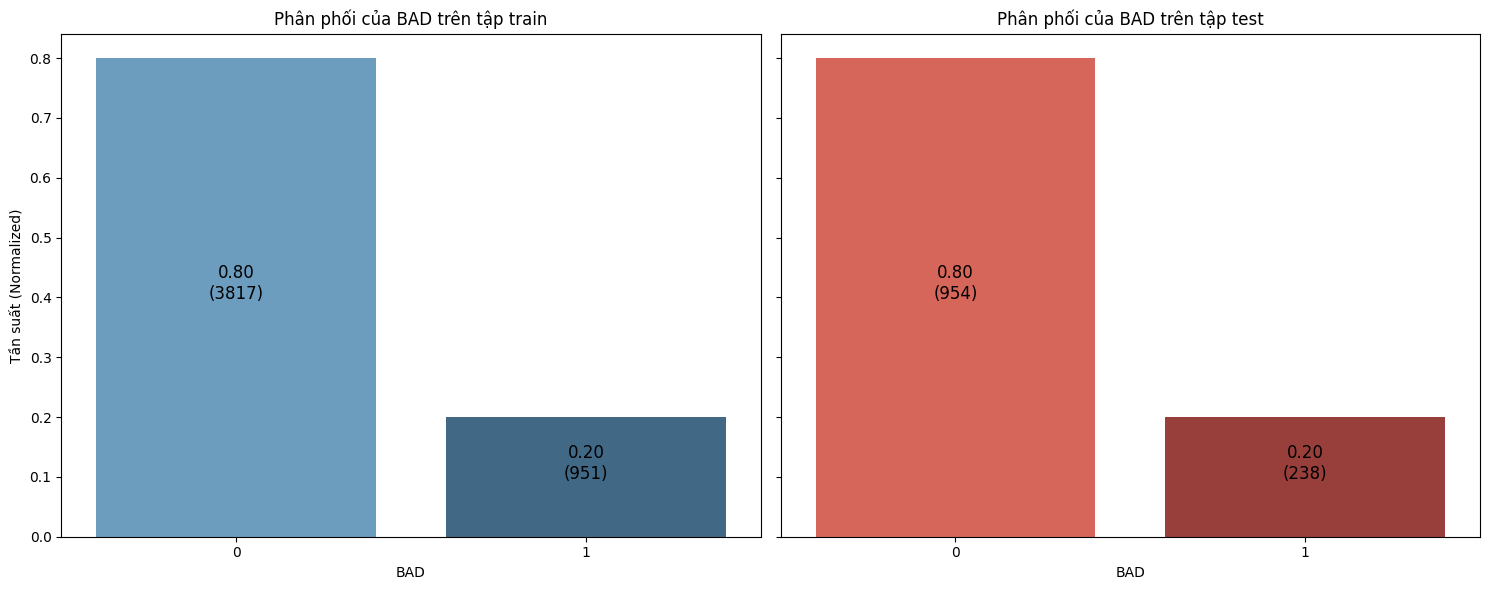

In [ ]:
distribution_categorical_type('BAD',y_train,y_test)
# Dữ liệu cột BAD loại 0 chiếm 80%
# Dữ liệu cột BAD loại 1 chiếm 20%

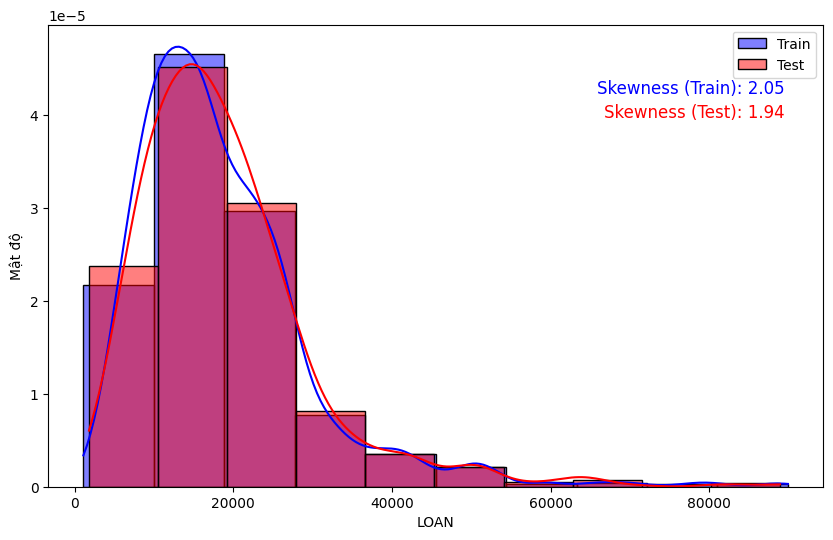

In [ ]:
distribution_numerical_type('LOAN')
# Cột LOAN ở tập train và tập test đều có xu hướng lệch phải, trong đó khoảng 10000 - 20000 tập trung nhiều dữ liệu nhất

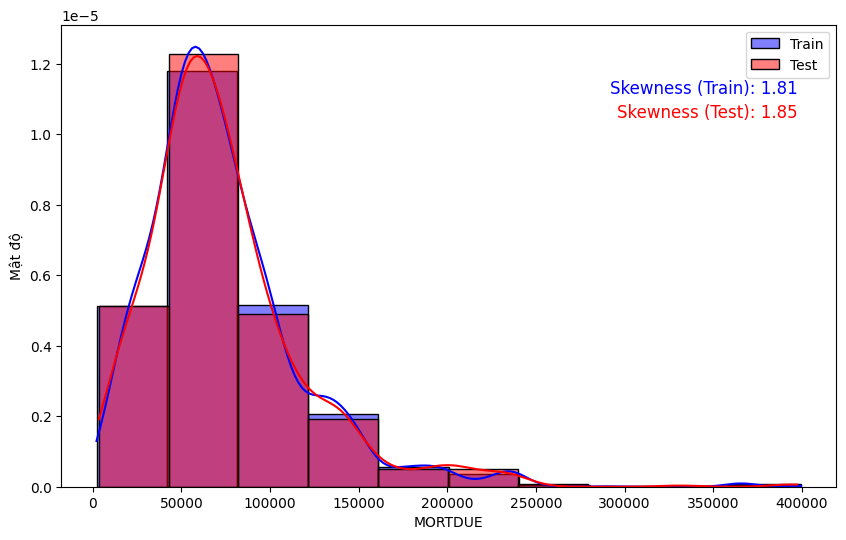

In [ ]:
distribution_numerical_type('MORTDUE')
 # Cột MORTDUE ở tập train và tập test đều có xu hướng lệch phải, trong đó khoảng xung quanh 50000 tập trung nhiều dữ liệu nhất

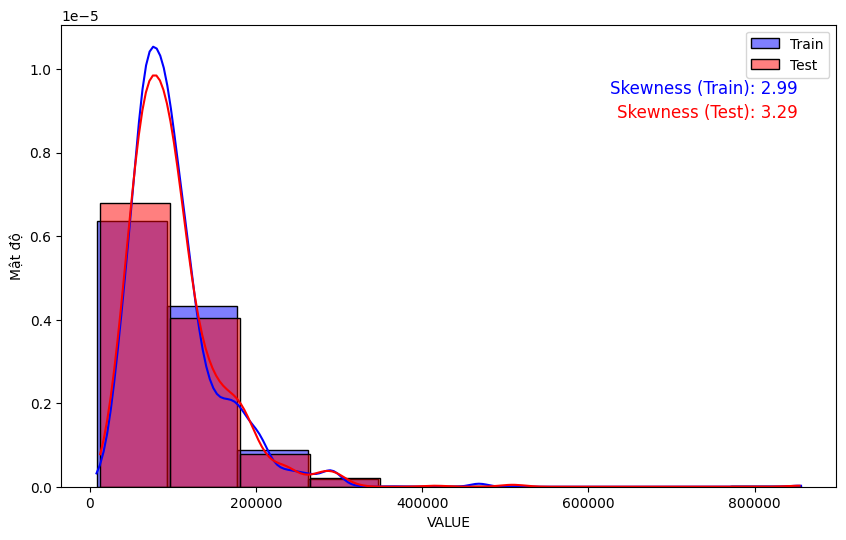

In [ ]:
distribution_numerical_type('VALUE')

# Cột VALUE ở tập train và tập test đều có xu hướng lệch phải,
# đặc biệt giá trị Skew của cả hai tập đều rất cao (trung bình là 3) cho thấy sự lệch phải rất mạnh ở tập này. Suy đoán, dữ liệu có bất thường
# Các vị trí phân bố trùng nhau giữa tập train và test có màu hồng nhạt

<ipython-input-15-3622173a1db2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
<ipython-input-15-3622173a1db2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')


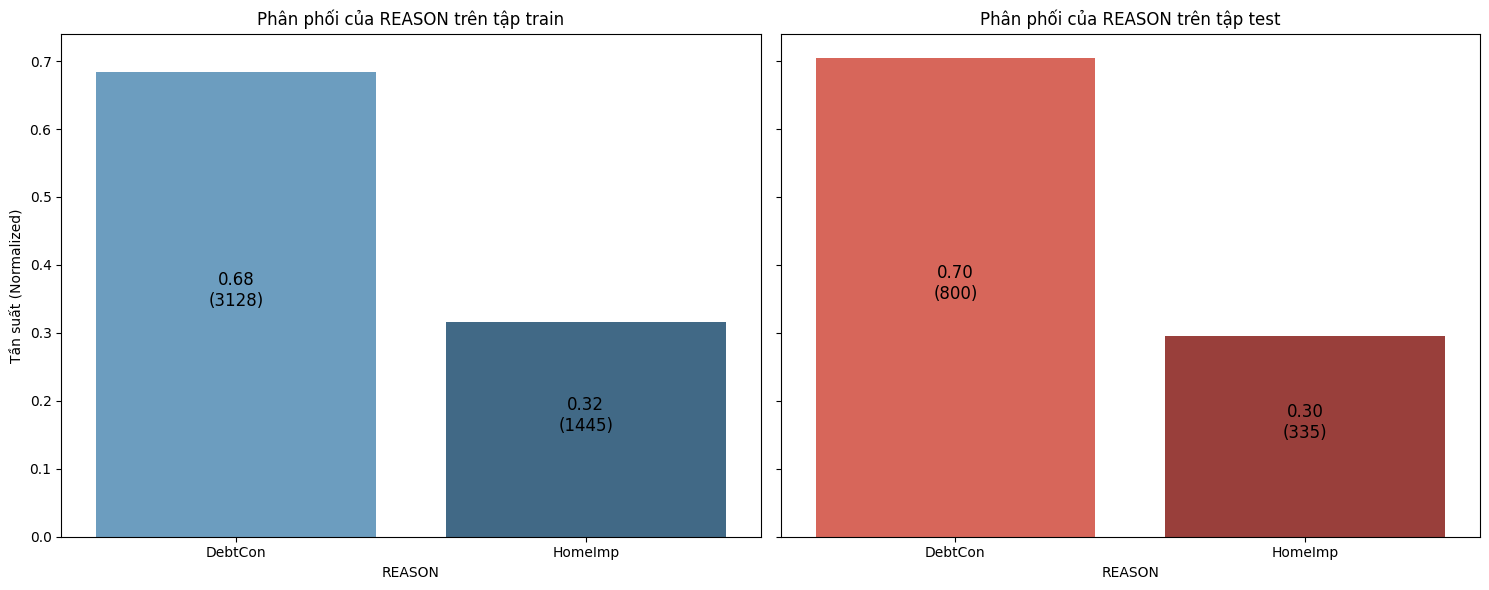

In [ ]:
distribution_categorical_type('REASON',x_train['REASON'],x_test['REASON'])
# Ở cả hai tập train và test, nhu cầu vay để ghép nợ (DebtCon) chiếm tới 70%

<ipython-input-15-3622173a1db2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
<ipython-input-15-3622173a1db2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')


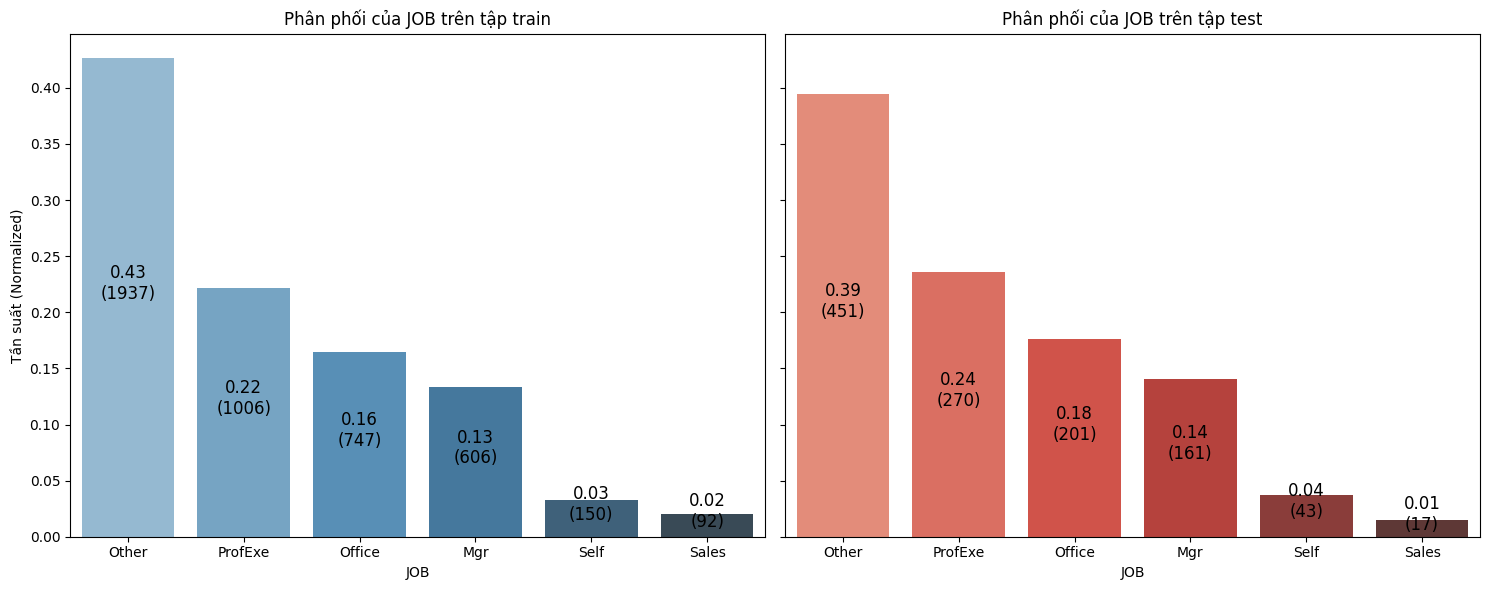

In [ ]:
distribution_categorical_type('JOB',x_train['JOB'],x_test['JOB'])
# Phân bố dữ liệu ở cả hai tập gần tương đồng nhau

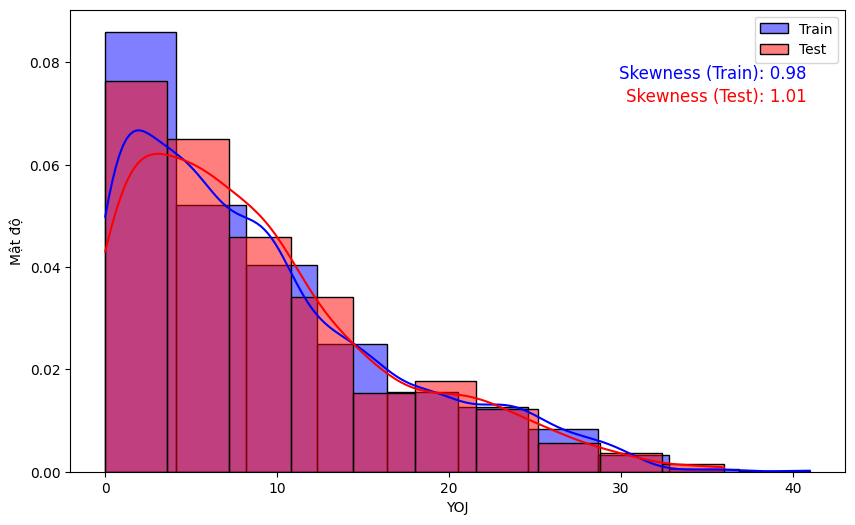

In [ ]:
distribution_numerical_type('YOJ')
# Cả hai bộ dữ liệu có phân phối tương đồng nhau, lệch phải, khoảng 0 - 3 năm tập trung nhiều dữ liệu nhất
# Các vị trí phân bố trùng nhau giữa tập train và test có màu hồng nhạt

<ipython-input-15-3622173a1db2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
<ipython-input-15-3622173a1db2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')


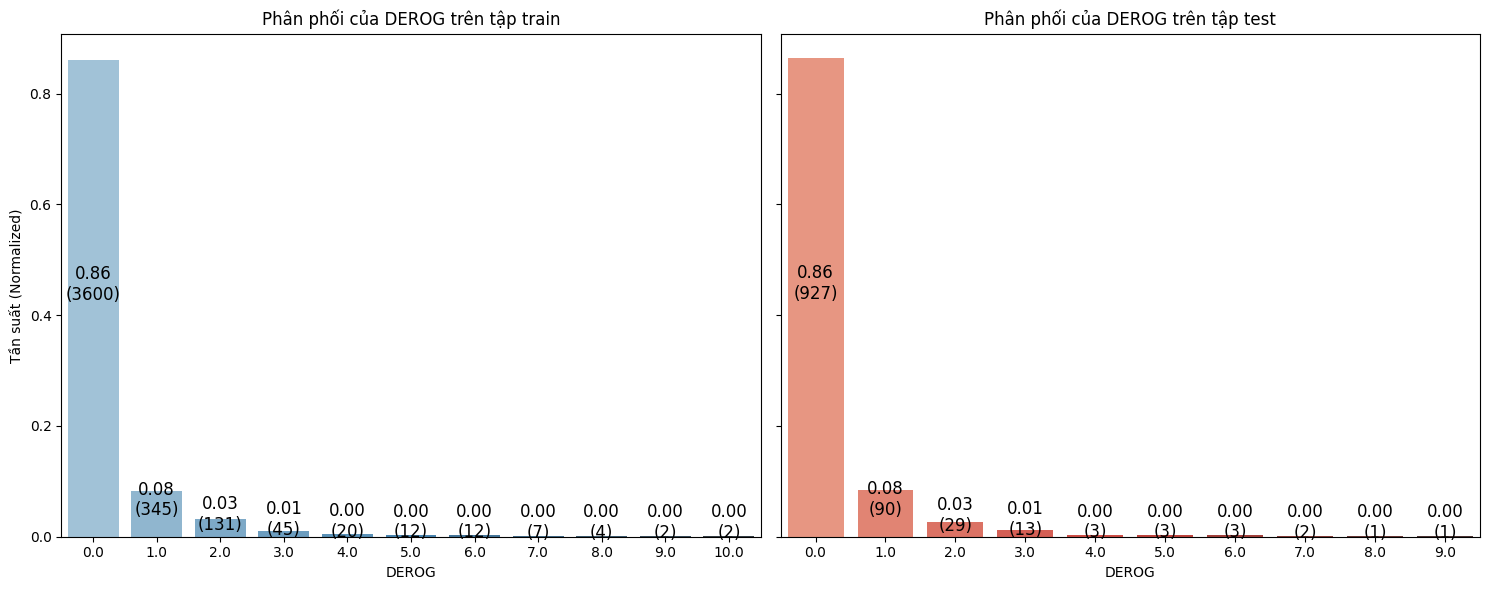

In [ ]:
distribution_categorical_type('DEROG',x_train['DEROG'],x_test['DEROG'])
# 0 số lượng báo cáo vỡ nợ chiếm 86% cao nhất ở cả 2 tập train và test

<ipython-input-15-3622173a1db2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
<ipython-input-15-3622173a1db2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')


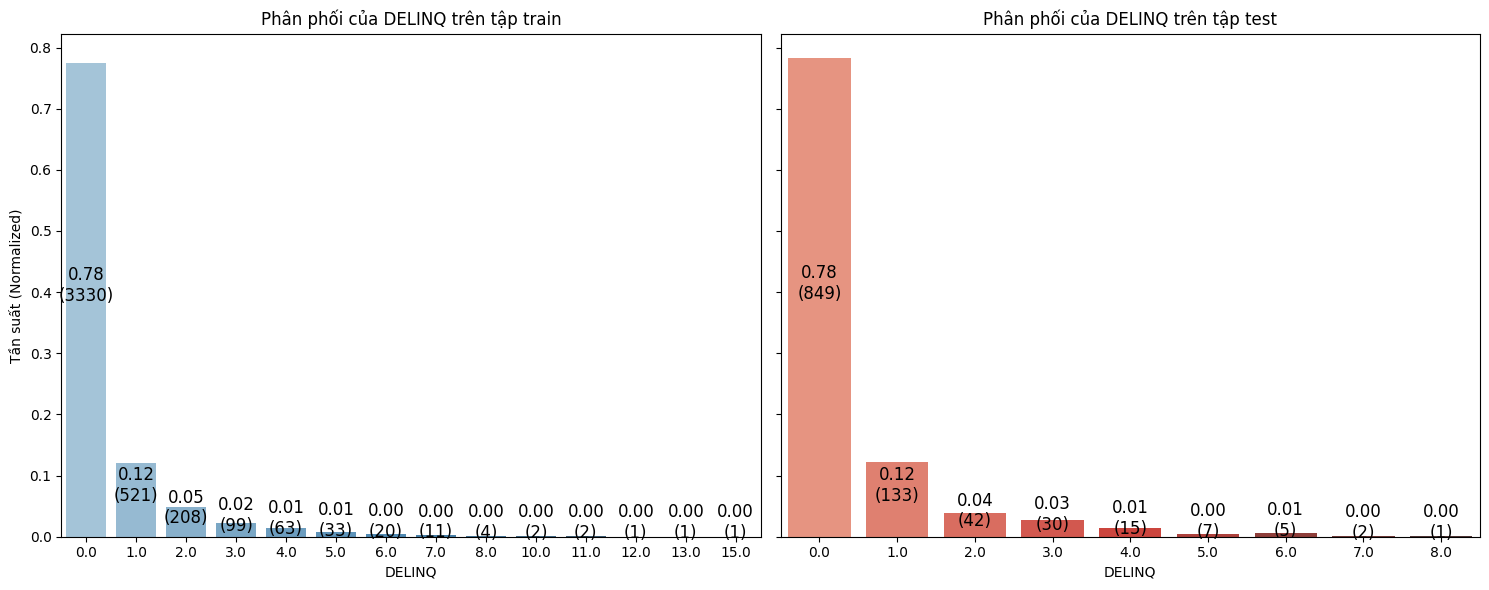

In [ ]:
distribution_categorical_type("DELINQ", x_train["DELINQ"], x_test["DELINQ"])
# 0 số lượng tín dụng quá hạn chiếm 78% cao nhất ở cả tập train và test

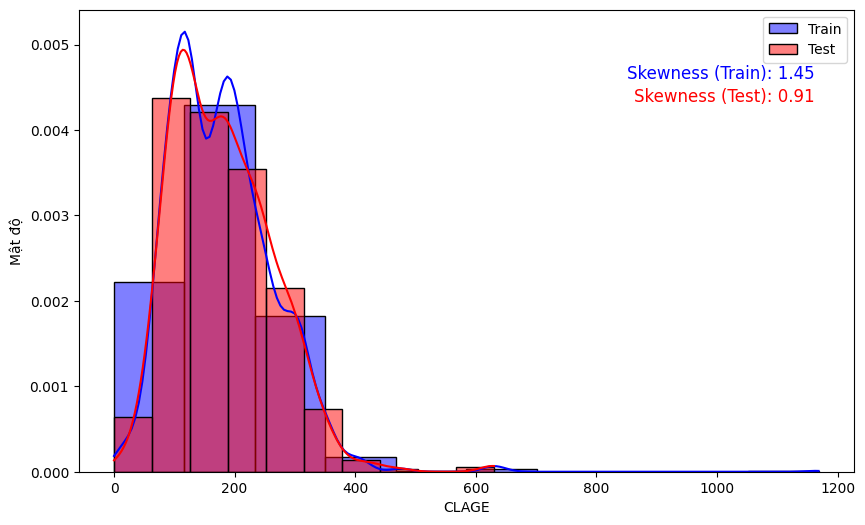

In [ ]:
distribution_numerical_type('CLAGE')
# Dữ liệu cột CLAGE (tuổi thọ tín dụng cao nhất) ở cả 2 tập train và test đều lệch phải, đạt đỉnh trong khoảng 0-200
# Các vị trí phân bố trùng nhau giữa tập train và test có màu hồng nhạt

<ipython-input-15-3622173a1db2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='Blues_d')
<ipython-input-15-3622173a1db2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='Reds_d')


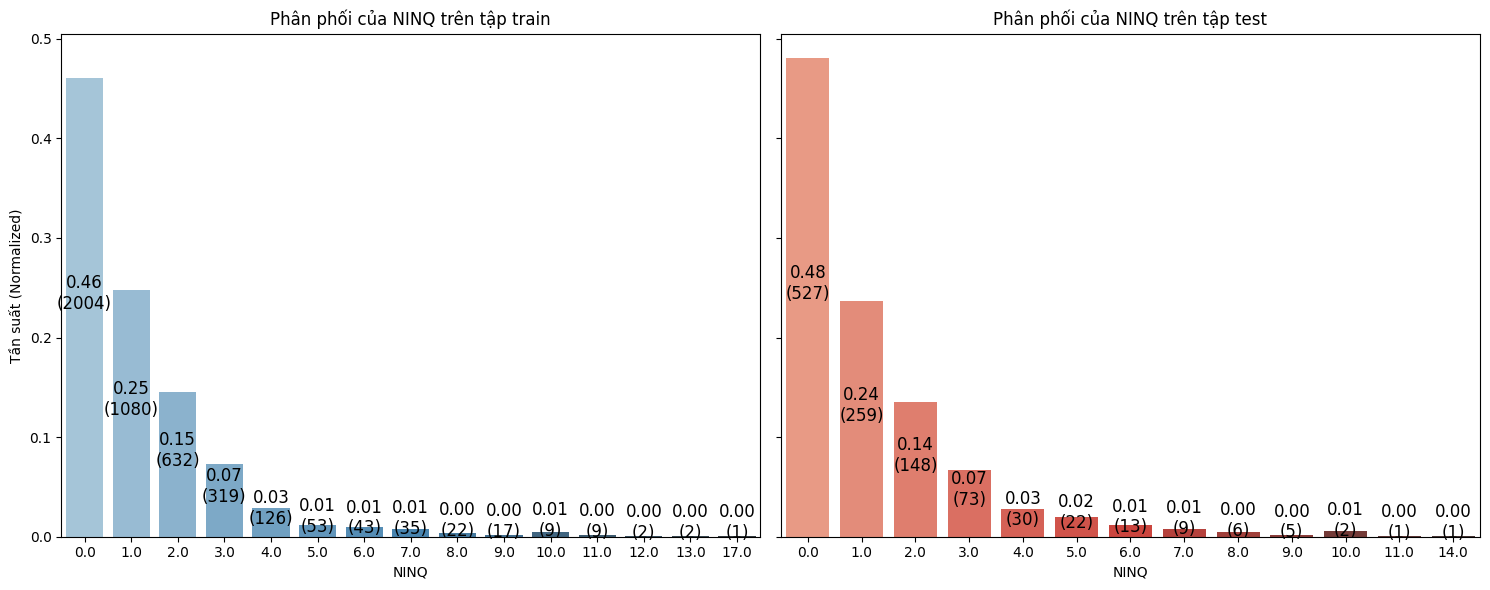

In [ ]:
distribution_categorical_type("NINQ", x_train["NINQ"], x_test["NINQ"])
# 0 yêu cầu tín dụng gần đây chiếm 46-48% cao nhất trên 2 tập train và test

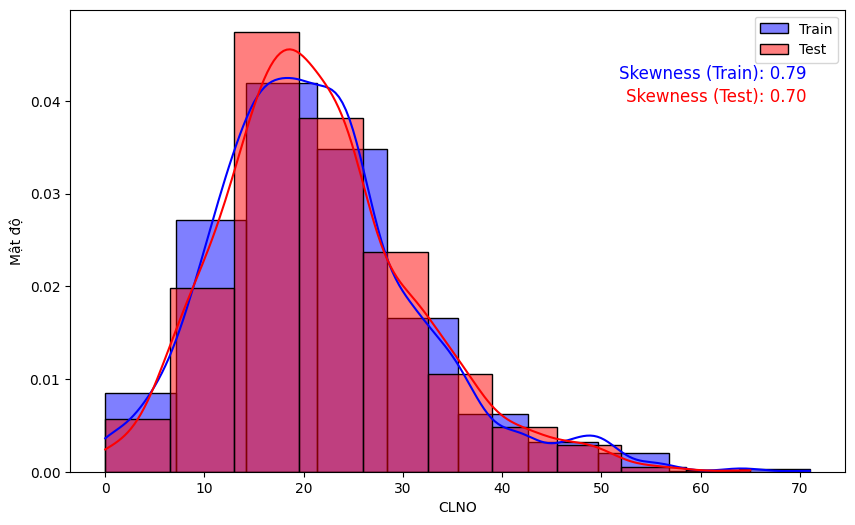

In [ ]:
distribution_numerical_type('CLNO')
# Phân bố hai tập train và test khá đối xứng nhưng vẫn có xu hướng lệch phải nhẹ
# Các vị trí phân bố trùng nhau giữa tập train và test có màu hồng nhạt

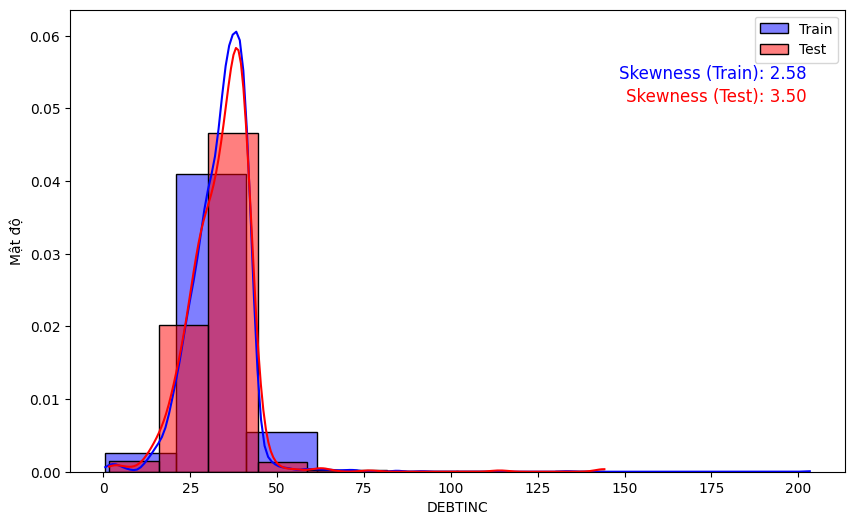

In [ ]:
distribution_numerical_type('DEBTINC')
# Cả hai tập train và test đều xó bị lệch hẳn sang phải (skew xấp xỉ 3), trong đó tập trung nhiều dữ liệu trong khoảng 25-50
# Suy đoán: bộ dữ liệu có bất thường
# Các vị trí phân bố trùng nhau giữa tập train và test có màu hồng nhạt

<p>Kết luận</p>
<p>- Đa số phân bố các trường định lượng có xu hướng lệch phải</p>
<p>- Các trường định tính đều có xu hướng trội hẳn ở 1-2 danh mục. </p>
<p>LOAN: Cột 'LOAN'  bị lệch phải (skewness = 2.06 và skewness = 1.95) ở cả hai tập train và tập test.</p>
<p>MORTDUE: Cột 'MORTDUE' bị lệch sang phải (skewness = 1.87 và skewness = 1.67) ở cả hai tập train và tập test.</p>
<p>VALUE: Cột 'VALUE' bị lệch hẳn về bên phải (skewness = 3.13 và skewness = 2.86) ở cả hai tập train và tập test.</p>
<p>YOJ: Cột 'YOJ' dường như bị lệch về bên phải (skewness = 0.99 và skewness = 0.99) ở cả hai tập train và tập test.</p>
<p>CLAGE: Cột 'CLAGE' dường như bị lệch sang phải (skewness = 1.51 và skewness = 0.94) ở cả hai tập train và tập test.</p>
<p>CLNO: Cột 'CLNO' dường như bị lệch sang phải (skewness = 0.8 và skewness = 0.71) ở cả hai tập train và tập test.</p>
<p>DEBTINC: Cột 'DEBTINC' (skewness = 2.59 và skewness = 3.24) bị lệch hẳn sang phải ở cả hai tập train và test.</p>


# Mối tương quan giữa các trường dữ liệu

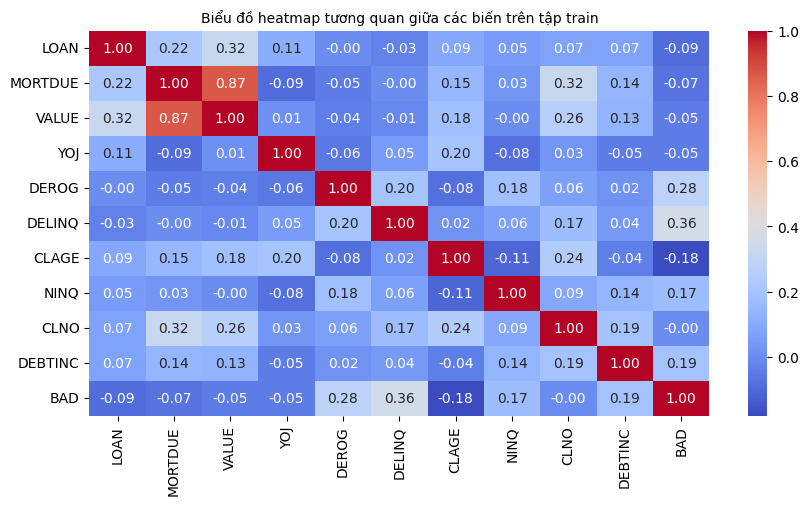

In [ ]:
data_corr = x_train.copy()
data_corr["BAD"] = y_train
data_corr = data_corr.drop(['JOB', 'REASON'], axis=1)
plt.figure(figsize=(10,5))
# Tạo ma trận tương quan
corr_matrix = round(data_corr.corr(),2)

# Vẽ biểu đồ heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

plt.title("Biểu đồ heatmap tương quan giữa các biến trên tập train",fontsize=10)

plt.show()

# TƯƠNG QUAN GIỮA CÁC BIẾN VÀ BIẾN DỰ ĐOÁN (BAD)

In [ ]:
def plot_crosstab(data, feature, target, ax, title):
    crosstab = pd.crosstab(data[feature], data[target])
    crosstab.div(crosstab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax, title=title,color=['blue','pink'])

def relationship_variable_with_target(data):
    # Tạo các subplot
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
    fig.suptitle("Relationships between 'BAD' and Different Features", fontsize=16)

    # Danh sách các tính năng và tiêu đề tương ứng
    features = ['REASON', 'JOB', 'DEROG', 'DELINQ', 'NINQ']
    titles = ['REASON vs BAD', 'JOB vs BAD', 'DEROG vs BAD', 'DELINQ vs BAD', 'NINQ vs BAD']

    # Vẽ các biểu đồ cho các tính năng
    for feature, title, ax in zip(features, titles, axes.flatten()[:5]):
        plot_crosstab(data, feature, 'BAD', ax, title)

    # Xử lý đặc biệt cho 'DEBTINC'
    bins = [0, 40, 100, 204]
    group = ['Low', 'Average', 'High']
    data['DEBTINC_bin'] = pd.cut(data['DEBTINC'], bins, labels=group)
    plot_crosstab(data, 'DEBTINC_bin', 'BAD', axes[2, 1], 'DEBTINC vs BAD')
    axes[2, 1].set_xlabel('DEBTINC')

    # Điều chỉnh bố cục và hiển thị các biểu đồ
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


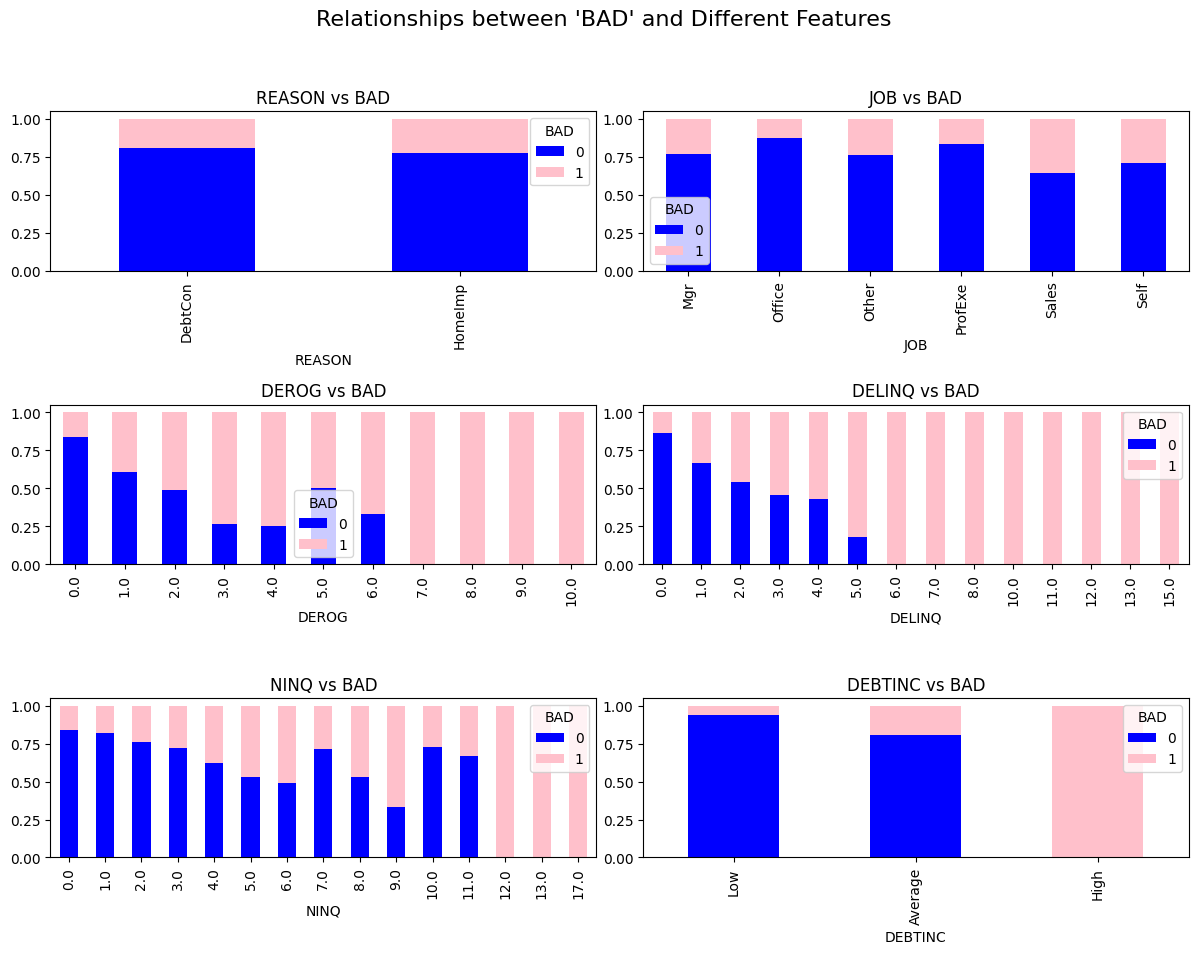

In [ ]:
data_corr = x_train.copy()
data_corr["BAD"] = y_train
relationship_variable_with_target(data_corr)

<p>Nhận xét: </p>
<p>Các biểu đồ trên cho thấy sự phụ thuộc của biến dự đoán (BAD) vào các biến khác có tính tương quan cao với biến dự đoán: <mark>JOB</mark>, <mark>REASON</mark>, <mark>DEROG</mark>, <mark>DELINQ</mark>, <mark>NINQ</mark>, <mark>DEBTINC</mark>.</p>

<p>- Phần trăm vỡ nợ do HomeImp cao hơn phần trăm vỡ nợ do DebtCon.
<p>- Phần trăm vỡ nợ với khách hàng làm ngành Sales cao nhất và phần trăm vỡ nợ khi làm các công việc khác là thấp nhất
<p>- Lượng báo cáo vỡ nợ (DEROG) càng lớn thì khả năng vỡ nợ càng cao, đặc biệt với số lượng báo cáo từ 7 trở lên đạt 100% khả năng vỡ nợ.
<p>- Số hạn mức tín dụng quá hạn (DELINQ) càng lớn thì khả năng vỡ nợ càng cao, đặc biệt với số hạn mức tín dụng quá hạn từ 7 trở lên đạt 100% khả năng vỡ nợ.
<p>- Lượng yêu cầu tín dụng (NINQ) càng lớn thì khả năng vỡ nợ càng cao, đặc biệt với lượng yêu cầu tín dụng từ 12 trở lên đạt 100% khả năng vỡ nợ.
<p>- Tỉ lệ (nợ/thu nhập) - DEBTINC càng lớn, nghĩa số tiền nợ hàng tháng phải trả quá cao so với mức lương thu nhập thì khả năng vỡ nợ càng cao, đặc biệt con số này đạt 100% thì có 100% khả năng vỡ nợ.

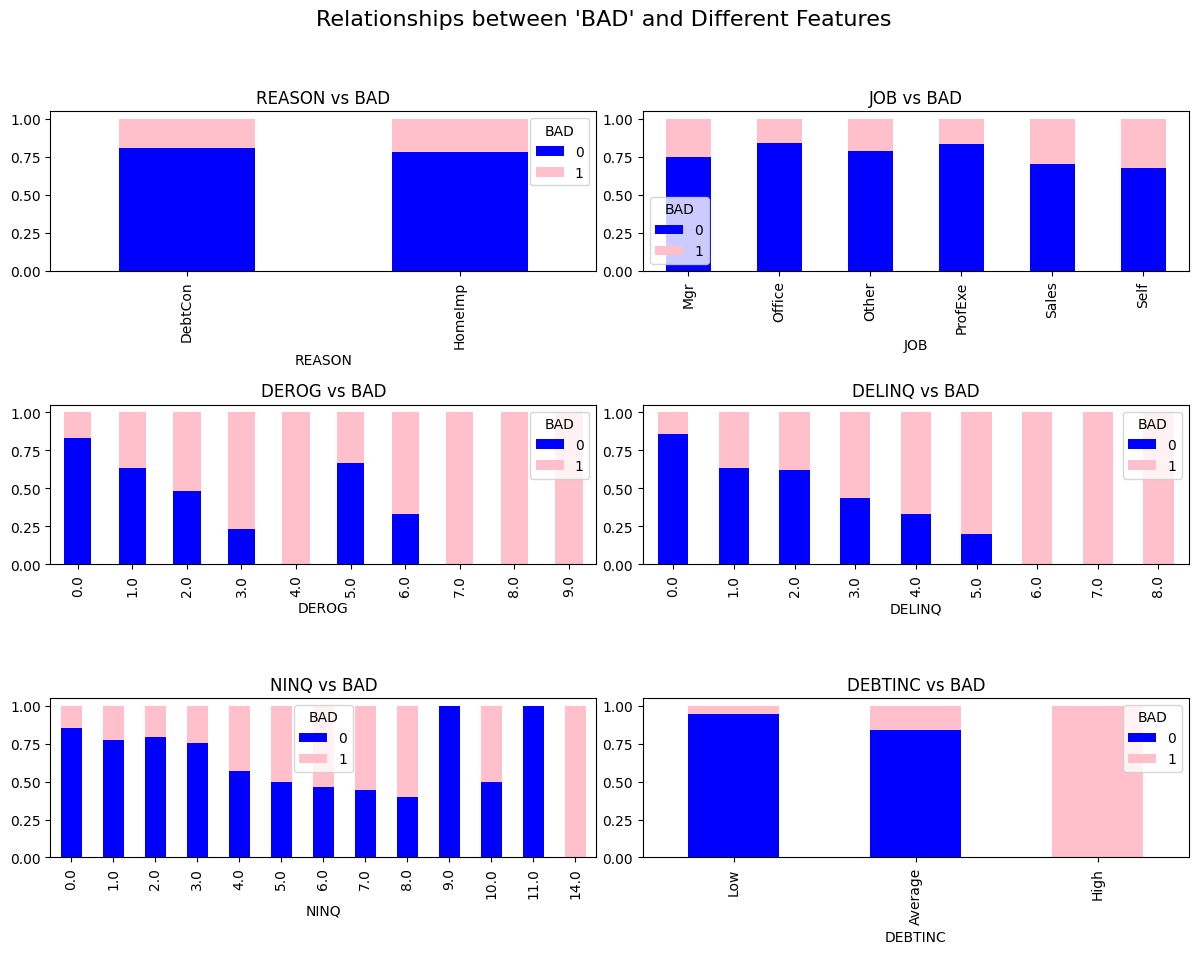

In [ ]:
data_corr_test = x_test.copy()
data_corr_test["BAD"] = y_test
relationship_variable_with_target(data_corr_test)

<p>Nhận xét: </p>
<p>- Nhìn chung, mối liên hệ giữa biến dự đoán và các biến khác ở tập test gần tương đồng với tập train </p>
<p>- Tuy nhiên, trong biểu đồ tương quan giữa BAD và JOB, người làm nghề Self có khả năng vỡ nợ cao nhất và Office có khả năng vỡ nợ ít nhất </p>

# Tiền xử lý dữ liệu

In [9]:
# Kiểm tra bộ dữ liệu có dữ liệu trùng lặp hay không
print("Có dữ liệu trùng lặp trên tập train không? ", x_train.duplicated().any())
print("Có dữ liệu trùng lặp trên tập test không? ", x_test.duplicated().any())

Có dữ liệu trùng lặp trên tập train không?  False
Có dữ liệu trùng lặp trên tập test không?  False


In [10]:
# Kiểm tra bao nhiêu trường dữ liệu có dữ liệu NaN
print("Số giá trị NaN ở từng trường dữ liệu trên tập train:")
print(x_train.isna().sum(), "\n")
print("Số giá trị NaN ở từng trường dữ liệu trên tập test:")
print(x_test.isna().sum())

Số giá trị NaN ở từng trường dữ liệu trên tập train:
LOAN          0
MORTDUE     421
VALUE        89
REASON      195
JOB         230
YOJ         403
DEROG       588
DELINQ      472
CLAGE       259
NINQ        414
CLNO        184
DEBTINC    1005
dtype: int64 

Số giá trị NaN ở từng trường dữ liệu trên tập test:
LOAN         0
MORTDUE     97
VALUE       23
REASON      57
JOB         49
YOJ        112
DEROG      120
DELINQ     108
CLAGE       49
NINQ        96
CLNO        38
DEBTINC    262
dtype: int64


In [11]:
# Phần trăm của giá trị NaN ở từng trường dữ liệu
print("Tỉ lệ giá trị Nan trên tập train:")
print(round((x_train.isnull().sum()/len(x_train)*100).sort_values(),2))
print("Tỉ lệ giá trị Nan trên tập test:")
print(round((x_test.isnull().sum()/len(x_test)*100).sort_values(),2))

Tỉ lệ giá trị Nan trên tập train:
LOAN        0.00
VALUE       1.87
CLNO        3.86
REASON      4.09
JOB         4.82
CLAGE       5.43
YOJ         8.45
NINQ        8.68
MORTDUE     8.83
DELINQ      9.90
DEROG      12.33
DEBTINC    21.08
dtype: float64
Tỉ lệ giá trị Nan trên tập test:
LOAN        0.00
VALUE       1.93
CLNO        3.19
JOB         4.11
CLAGE       4.11
REASON      4.78
NINQ        8.05
MORTDUE     8.14
DELINQ      9.06
YOJ         9.40
DEROG      10.07
DEBTINC    21.98
dtype: float64


<p>
  Nhận xét: Dữ liệu được cung cấp cho thấy tỉ lệ giá trị NaN trên các biến khác nhau trong tập train và tập test như sau:
</p>

<h3>Tập train:</h3>
<ul>
  <li>DEBTINC có tỉ lệ NaN cao nhất, đạt 21.08%, tiếp theo là DEROG với 12.33%.</li>
  <li>Các biến NINQ, YOJ, MORTDUE, DELINQ cũng có tỉ lệ NaN khá cao, dao động từ khoảng 8% đến gần 10%.</li>
</ul>

<h3>Tập test:</h3>
<ul>
  <li>DEBTINC tiếp tục là biến có tỉ lệ NaN cao nhất, đạt 21.98%.</li>
  <li>Các biến DEROG, DELINQ, NINQ, YOJ, MORTDUE cũng có tỉ lệ NaN tương đối cao, dao động từ khoảng 8% đến hơn 10%.</li>
</ul>

<p>
  Việc xử lý dữ liệu NaN là rất quan trọng để đảm bảo chất lượng của mô hình học máy. Đặc biệt là việc xử lý biến DEBTINC với tỉ lệ NaN rất cao có thể ảnh hưởng nghiêm trọng đến kết quả dự đoán.
</p>

Chiến lược xử lý giá trị NaN:
- Với các trường kiểu số: Điền vào các giá trị median, mean, hồi quy và 1 giá trị thay thế khác
- Với các trường phân loại: mode và giá trị thay thế khác

In [12]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4768 entries, 609 to 2
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     4768 non-null   int64  
 1   MORTDUE  4347 non-null   float64
 2   VALUE    4679 non-null   float64
 3   REASON   4573 non-null   object 
 4   JOB      4538 non-null   object 
 5   YOJ      4365 non-null   float64
 6   DEROG    4180 non-null   float64
 7   DELINQ   4296 non-null   float64
 8   CLAGE    4509 non-null   float64
 9   NINQ     4354 non-null   float64
 10  CLNO     4584 non-null   float64
 11  DEBTINC  3763 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 484.2+ KB
None


<p> Các chiến lược fillna như sau: </p>
<p>1. Các trường số lệch phải fill median (median ít bị ảnhh hưởng bởi giá trị ngoại lai), các trường phân loại điền vào 1 giá trị thay thế,xóa các hàng null từ 4 trở lên (chỉ có 2 hàng null từ 4 trở lên do đó không mất nhiều dữ liệu) . </p>
<p>2. Các trường số lệch phải fill median, các trường phân loại điền vào giá trị nhiều nhất (để giữ tính chất phân phối dữ liệu), xóa các hàng null từ 4 trở lên (chỉ có 2 hàng null từ 4 trở lên do đó không mất nhiều dữ liệu) . </p>

In [13]:
def strategy_1(x,y,is_drop=True):
    # Loại bỏ các hàng có 4 bản ghi nếu is_drop == True
    if is_drop:
        data = pd.concat([x,y],axis=1)
        data.dropna(axis = 0, thresh=3,inplace=True)
        y = data['BAD']
        x = data.drop(['BAD'],axis=1)
    for column in x.columns[1:]:
        if x[column].dtype == 'object':
            # Fill giá trị thay thế vào các cột Reason và job
            if (column == 'Reason' or column == 'JOB'):
                x.fillna('Unknown')
        else:
            # Thay thế các vị trí NA bằng giá trị trung vị xét từng trường hợp y = 0 và y=1
            x.loc[(x[column].isna()) & (y == 0), column] = round(x[y == 0][column].median(), 0)
            x.loc[(x[column].isna()) & (y == 1), column] = round(x[y == 1][column].median(), 0)
    return x,y

In [14]:
def strategy_2(x,y,is_drop=True):
    # Loại bỏ các hàng có 4 bản ghi nếu is_drop == True
    if is_drop:
        data = pd.concat([x,y],axis=1)
        data.dropna(axis = 0, thresh=3,inplace=True)
        y = data['BAD']
        x = data.drop(['BAD'],axis=1)
    for column in x.columns[1:]:
        if x[column].dtype == 'object':
            # Fill giá trị nhiều nhất vào các cột Reason và job
            x[column].fillna(x[column].mode().iloc[0], inplace=True)
        else:
            # Thay thế các vị trí NA bằng giá trị xuất hiện nhiều nhất xét từng trường hợp y = 0 và y=1
            x.loc[(x[column].isna()) & (y == 0), column] = x[y == 0][column].value_counts().idxmax()
            x.loc[(x[column].isna()) & (y == 1), column] = x[y == 1][column].value_counts().idxmax()
    return x,y

## ONE-HOT CODING

In [15]:
def onehotcoding_label(x, index, save):
    labelEncoder = LabelEncoder()
    for column in x.columns:
        if x[column].dtype == 'object':
            x[column] = labelEncoder.fit_transform(x[column])
    if save:
        pickle.dump(labelEncoder, open(f'G:\\APACHE_AIRFLOW\\model\\Credit score\\model_df{index}\\LabelEncoder.pickle', 'wb'))

## Xử lý outlier

In [16]:
def show_outliers_boxplot(df):
    # Tạo figure và axes cho subplot
    fig, ax = plt.subplots(df.shape[1], 1, figsize=(10, 2 * df.shape[1]))

    # Duyệt qua từng cột trong DataFrame
    for i, column in enumerate(df.columns):
        ax[i].boxplot(df[column])
        ax[i].set_title(f'Boxplot of {column}')
        ax[i].set_ylabel(column)

    plt.tight_layout()
    plt.show()

In [17]:
def remove_outliers_iqr(x, y, columns):
    df = pd.concat([x, y], axis=1)
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    df_final = df[~outlier_mask]

    # Split back into X and Y
    x = df_final.iloc[:, :len(x.columns)]
    y = df_final.iloc[:, len(x.columns):]

    return x, y

## Chuẩn hóa dữ liệu

In [18]:
def standardScaler_data(X, y, index, save):
    # Ít bị ảnh hưởng bởi ngoại lệ
    # Chuẩn hóa theo Z-score
    # Trung bình = 0 và độ lệch chuẩn 1
    # Khoảng giá trị có thể có các số ngoài khoảng [0,1]
  scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
  scaled_features = scaler.fit_transform(X)

  scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
  if save:
    pickle.dump(scaler, open(f'G:\\APACHE_AIRFLOW\\model\\Credit score\\model_df{index}\\StandardScaler.pickle', 'wb'))
  return scaled_features_df,y

def MinMaxScaler_data(X, y, index, save):
# Dễ bị ảnhh hưởng bởi ngoại lệ
# Giữ nguyên mối quan hệ tuyến tính giữa các biến, quy khoảng giá trị về [0,1]
  scaler = MinMaxScaler()
  scaled_features = scaler.fit_transform(X)

  scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
  if save:
    pickle.dump(scaler, open(f'G:\\APACHE_AIRFLOW\\model\\Credit score\\model_df{index}\\MinMaxScaler.pickle', 'wb'))
  return scaled_features_df,y

## Tạo dữ liệu

### BỘ DỮ LIỆU 1: Chiến lược 1
- Không bỏ các hàng có từ 4 vị trí null trở lên
- Loại bỏ outlier
- Mã hóa nhãn biến phân loại về dạng số - one hot coding
- Chuẩn hóa dữ liệu bằng Standard

In [19]:
x_train_1, x_test_1, y_train_1, y_test_1 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [20]:
# Không bỏ các hàng có từ 4 vị trí null trở lên và Triển khai theo chiến lược 1
x_train_1,y_train_1 = strategy_1(x_train_1,y_train_1,False)
x_test_1,y_test_1 = strategy_1(x_test_1,y_test_1,False)
# Loại bỏ ngoại lệ các cột có giá trị skew trung bình là 3
remove_outliers_iqr(x_train_1,y_train_1,['VALUE','DEBTINC'])
remove_outliers_iqr(x_test_1,y_test_1,['VALUE','DEBTINC'])
# LabelEncode
onehotcoding_label(x_train_1,1,True)
onehotcoding_label(x_test_1,1,False)
# Chuẩn hóa dạng Standard Scaler
x_train_1, y_train_1 = standardScaler_data(x_train_1, y_train_1, 1, True)
x_test_1, y_test_1 = standardScaler_data(x_test_1, y_test_1, 1, False)

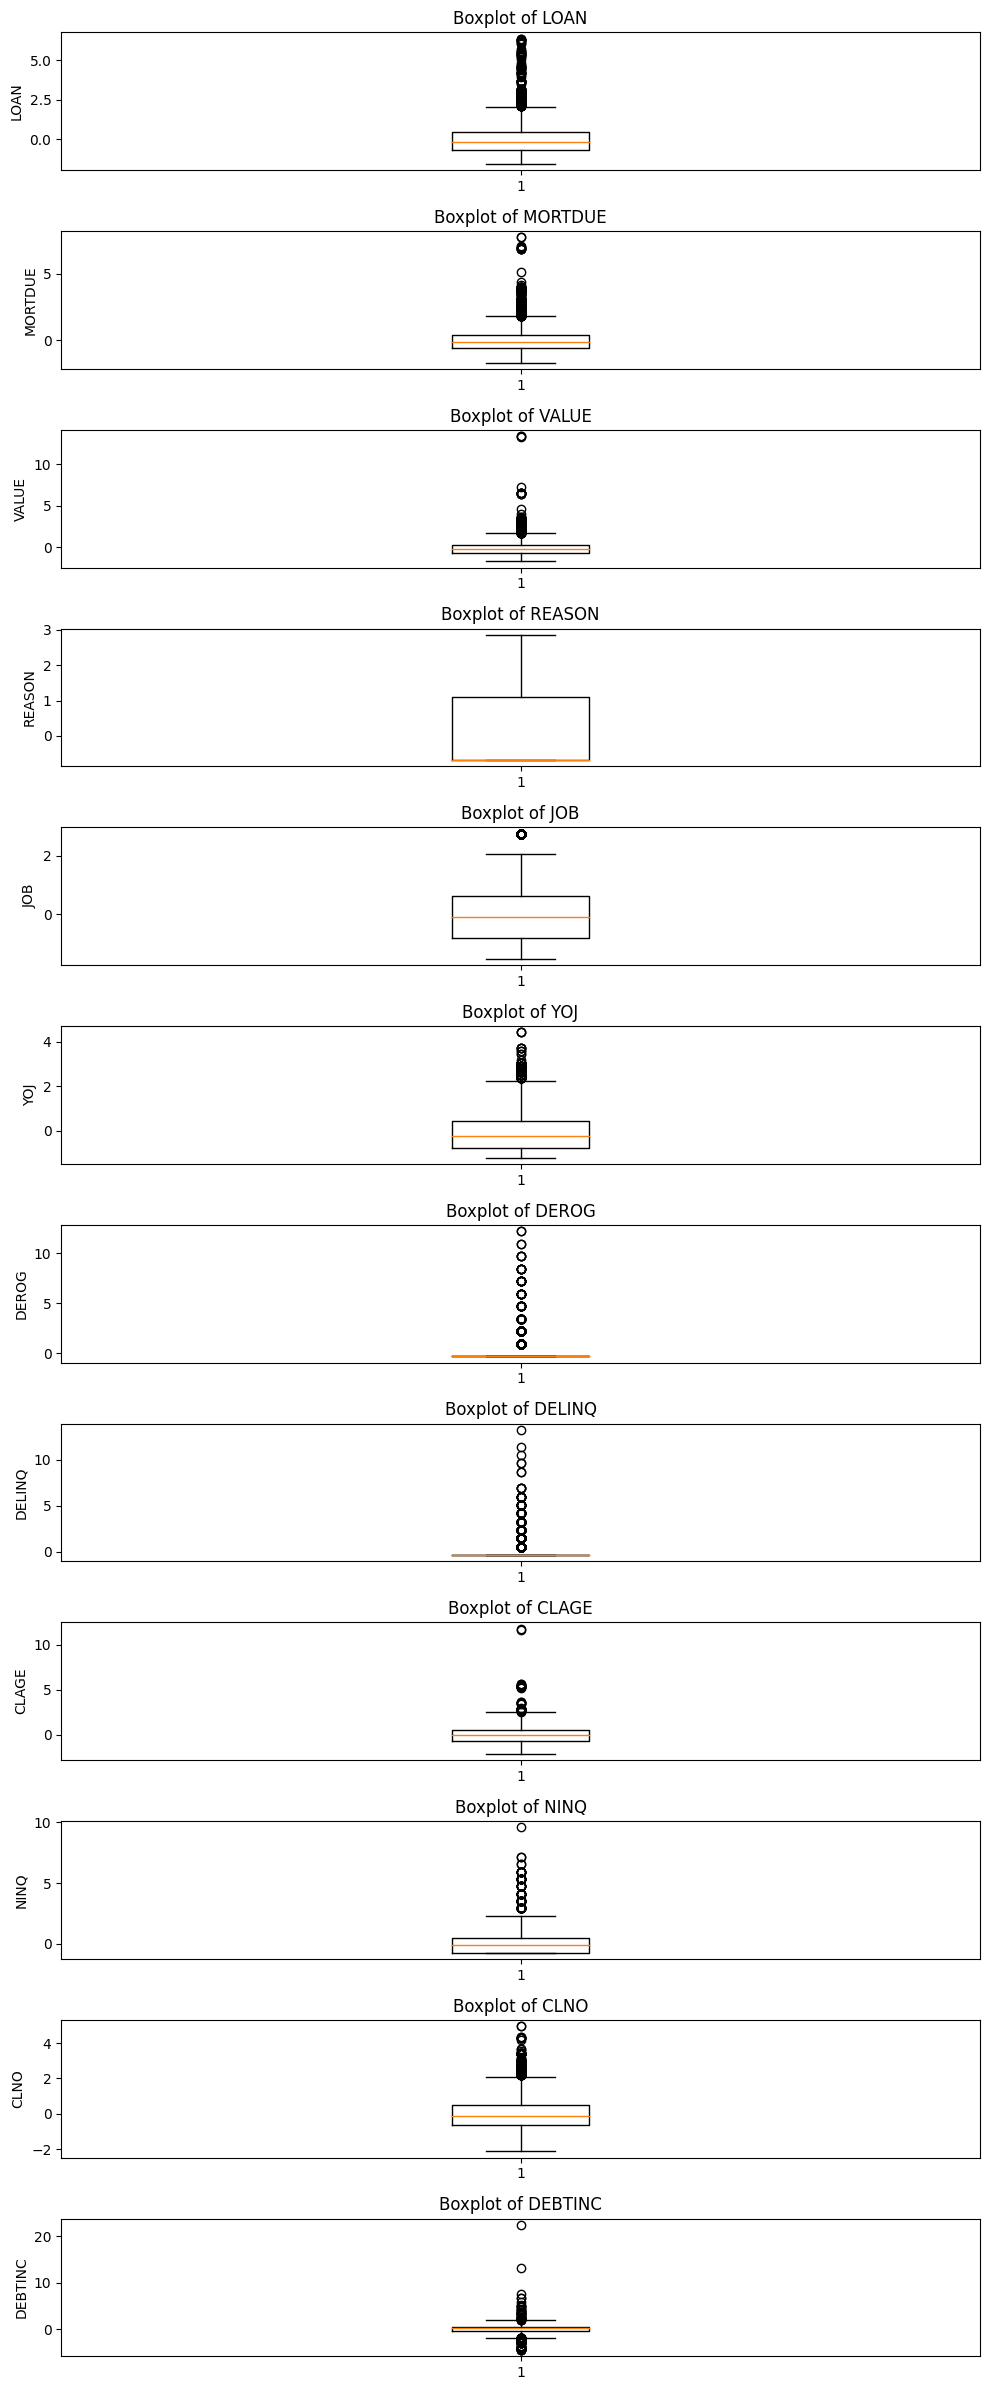

In [ ]:
show_outliers_boxplot(x_train_1)

### BỘ DỮ LIỆU 2: Chiến lược 1
- Bỏ các hàng có từ 4 vị trí null trở lên
- Loại bỏ outlier
- Mã hóa nhãn biến phân loại về dạng số - one hot coding
- Chuẩn hóa dữ liệu bằng MinMax

In [21]:
x_train_2, x_test_2, y_train_2, y_test_2 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [22]:
# Bỏ các hàng có từ 4 vị trí null trở lên và Triển khai theo chiến lược 1
x_train_2,y_train_2 = strategy_1(x_train_2,y_train_2)
x_test_2,y_test_2 = strategy_1(x_test_2,y_test_2)
# Loại bỏ ngoại lệ các cột có giá trị skew trung bình là 3
remove_outliers_iqr(x_train_2,y_train_2,['VALUE','DEBTINC'])
remove_outliers_iqr(x_test_2,y_test_2,['VALUE','DEBTINC'])
# LabelEncode
onehotcoding_label(x_train_2,2,True)
onehotcoding_label(x_test_2,2,False)
# Chuẩn hóa dạng Standard Scaler
x_train_2, y_train_2 = MinMaxScaler_data(x_train_2, y_train_2, 2, True)
x_test_2, y_test_2 = MinMaxScaler_data(x_test_2, y_test_2, 2, False)

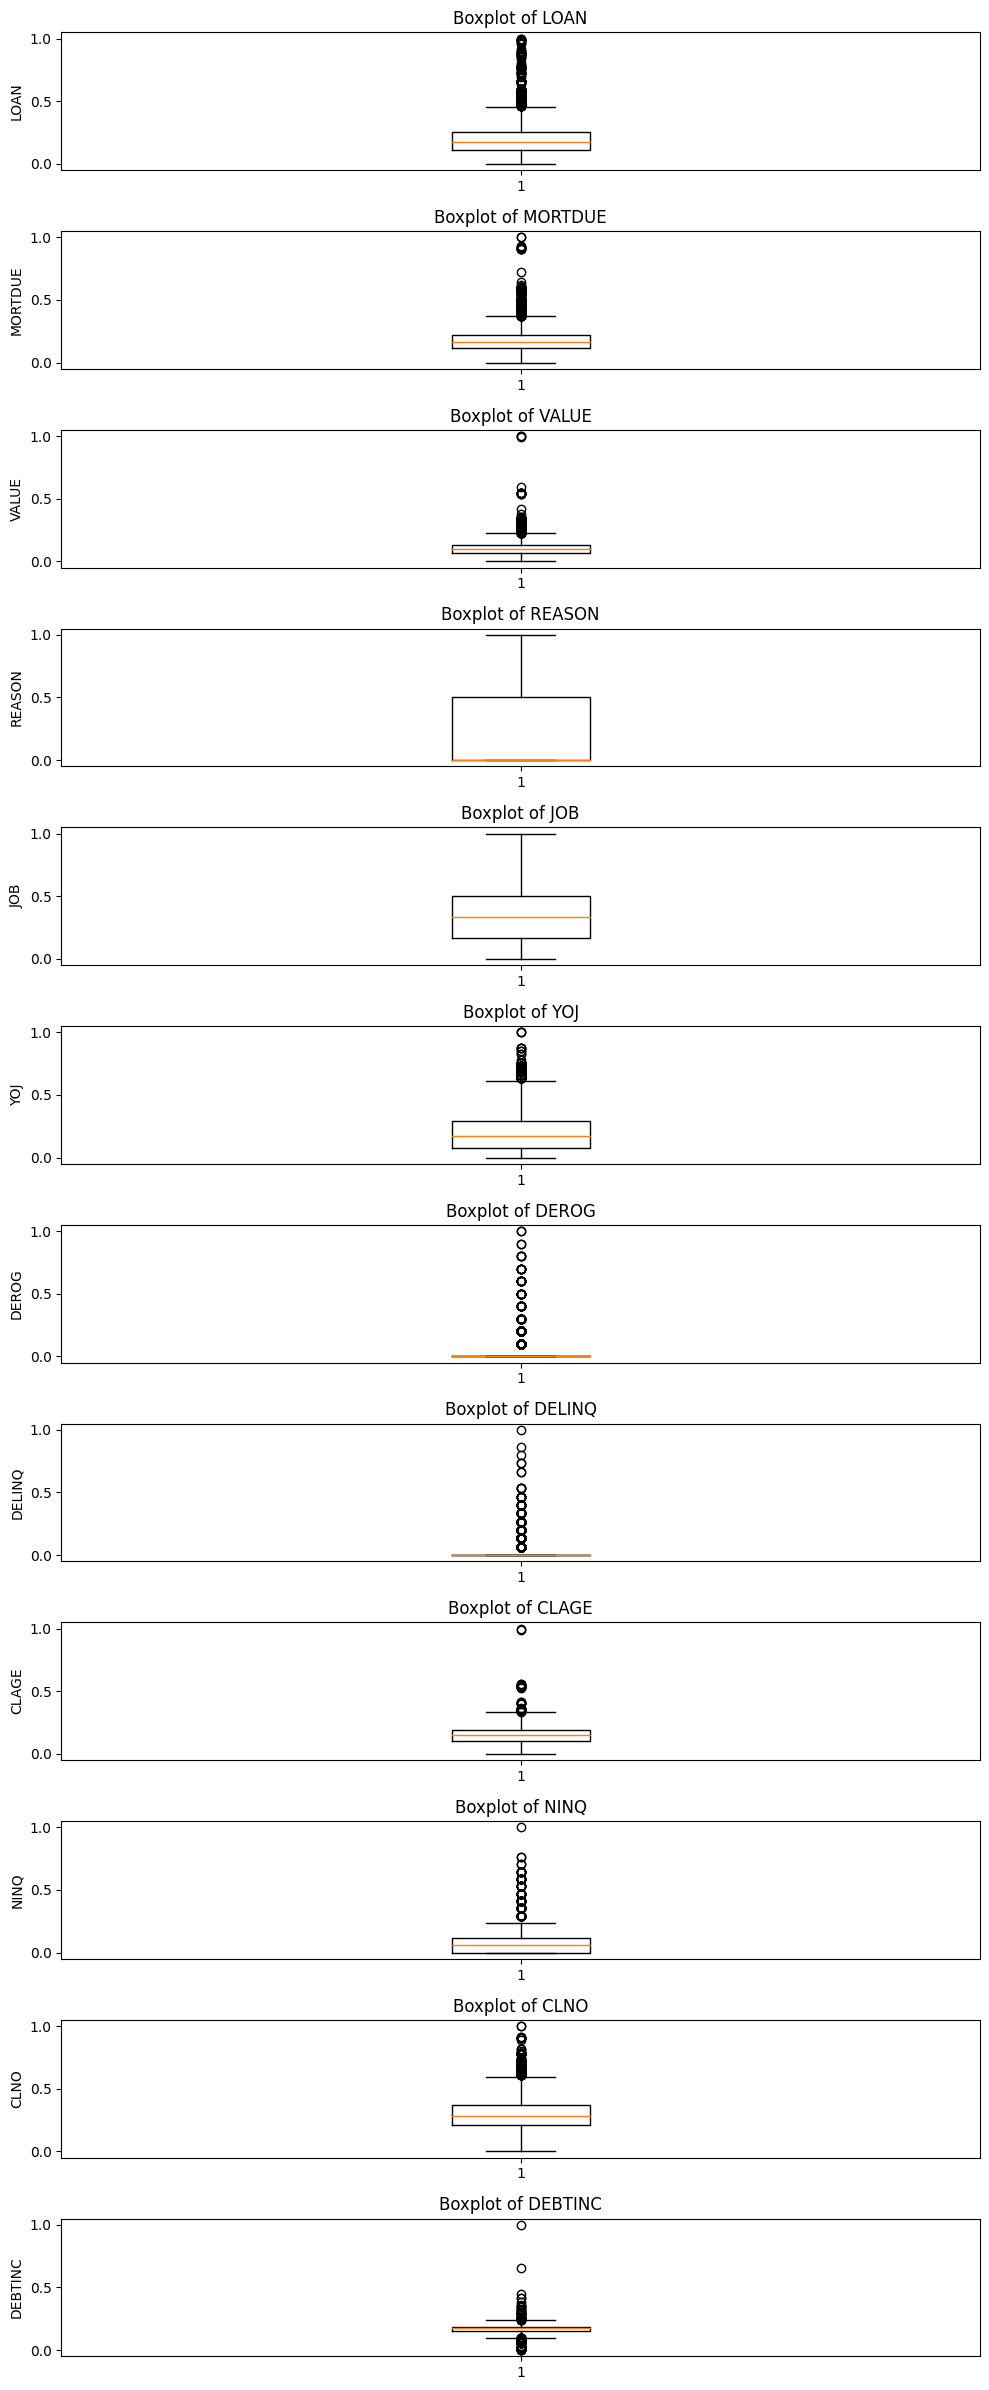

In [ ]:
show_outliers_boxplot(x_train_2)

### BỘ DỮ LIỆU 3: Chiến lược 2
- Không bỏ các hàng có từ 4 vị trí null trở lên
- Loại bỏ outlier
- Mã hóa nhãn biến phân loại về dạng số - one hot coding
- Chuẩn hóa dữ liệu bằng Standard

In [23]:
x_train_3, x_test_3, y_train_3, y_test_3 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [24]:
# Không bỏ các hàng có từ 4 vị trí null trở lên và Triển khai theo chiến lược 2
x_train_3,y_train_3 = strategy_2(x_train_3,y_train_3,False)
x_test_3,y_test_3 = strategy_2(x_test_3,y_test_3,False)
# Loại bỏ ngoại lệ các cột có giá trị skew trung bình là 3
remove_outliers_iqr(x_train_3,y_train_3,['VALUE','DEBTINC'])
remove_outliers_iqr(x_test_3,y_test_3,['VALUE','DEBTINC'])
# LabelEncode
onehotcoding_label(x_train_3,3,True)
onehotcoding_label(x_test_3,3,False)
# Chuẩn hóa dạng Standard Scaler
x_train_3, y_train_3 = standardScaler_data(x_train_3, y_train_3, 3, True)
x_test_3, y_test_3 = standardScaler_data(x_test_3, y_test_3, 3, False)

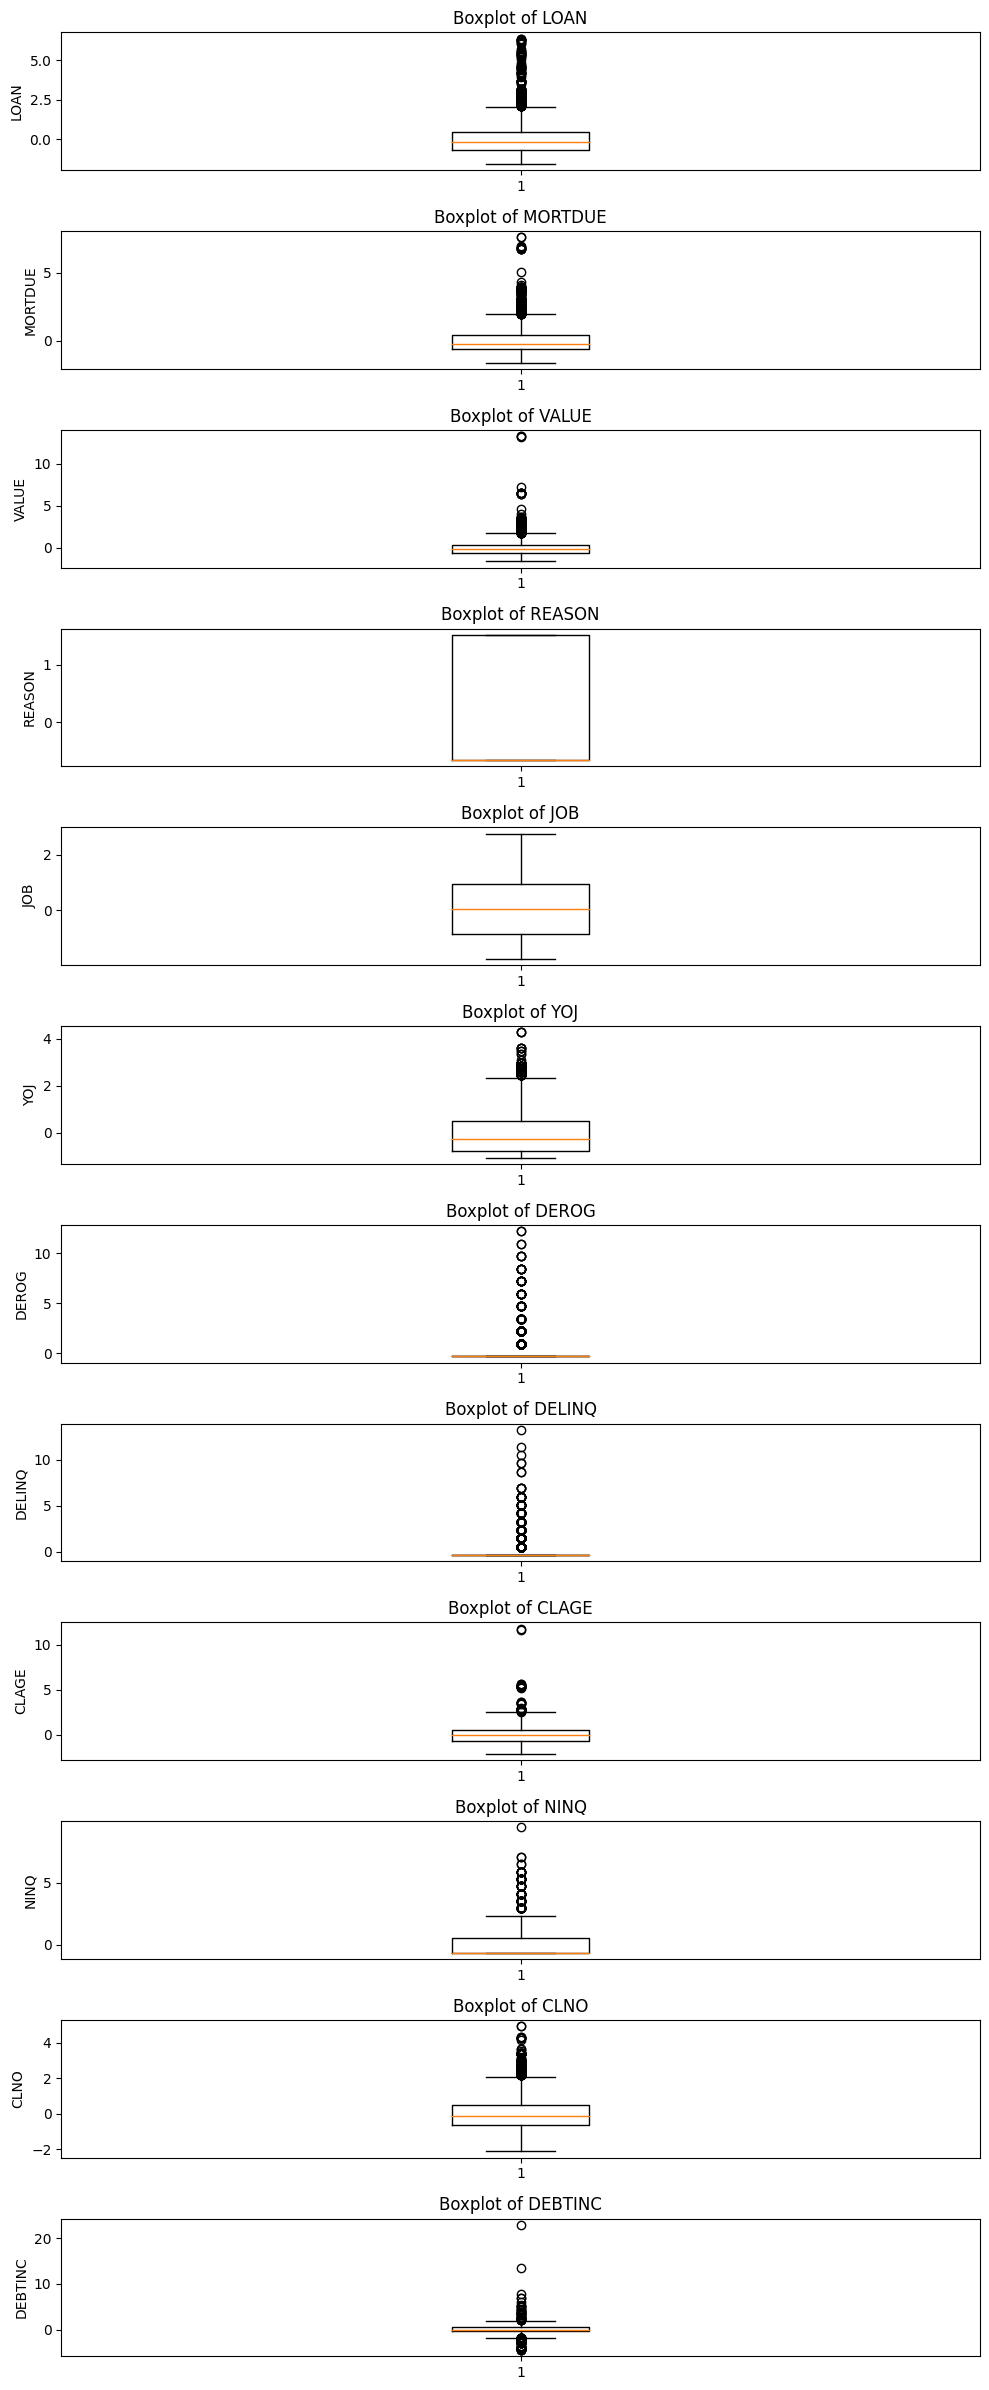

In [25]:
show_outliers_boxplot(x_train_3)

### BỘ DỮ LIỆU 4: Chiến lược 2
- Bỏ các hàng có từ 4 vị trí null trở lên
- Loại bỏ outlier
- Mã hóa nhãn biến phân loại về dạng số - one hot coding
- Chuẩn hóa dữ liệu bằng MinMax

In [ ]:
x_train_4, x_test_4, y_train_4, y_test_4 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
# Bỏ các hàng có từ 4 vị trí null trở lên và Triển khai theo chiến lược 2
x_train_4,y_train_4 = strategy_2(x_train_4,y_train_4,True)
x_test_4,y_test_4 = strategy_2(x_test_4,y_test_4,True)
# Loại bỏ ngoại lệ các cột có giá trị skew trung bình là 3
remove_outliers_iqr(x_train_4,y_train_4,['VALUE','DEBTINC'])
remove_outliers_iqr(x_test_4,y_test_4,['VALUE','DEBTINC'])
# LabelEncode
onehotcoding_label(x_train_4,4,True)
onehotcoding_label(x_test_4,4,False)
# Chuẩn hóa dạng Standard Scaler
x_train_4, y_train_4 = MinMaxScaler_data(x_train_4, y_train_4, 4, True)
x_test_4, y_test_4 = MinMaxScaler_data(x_test_4, y_test_4, 4, False)

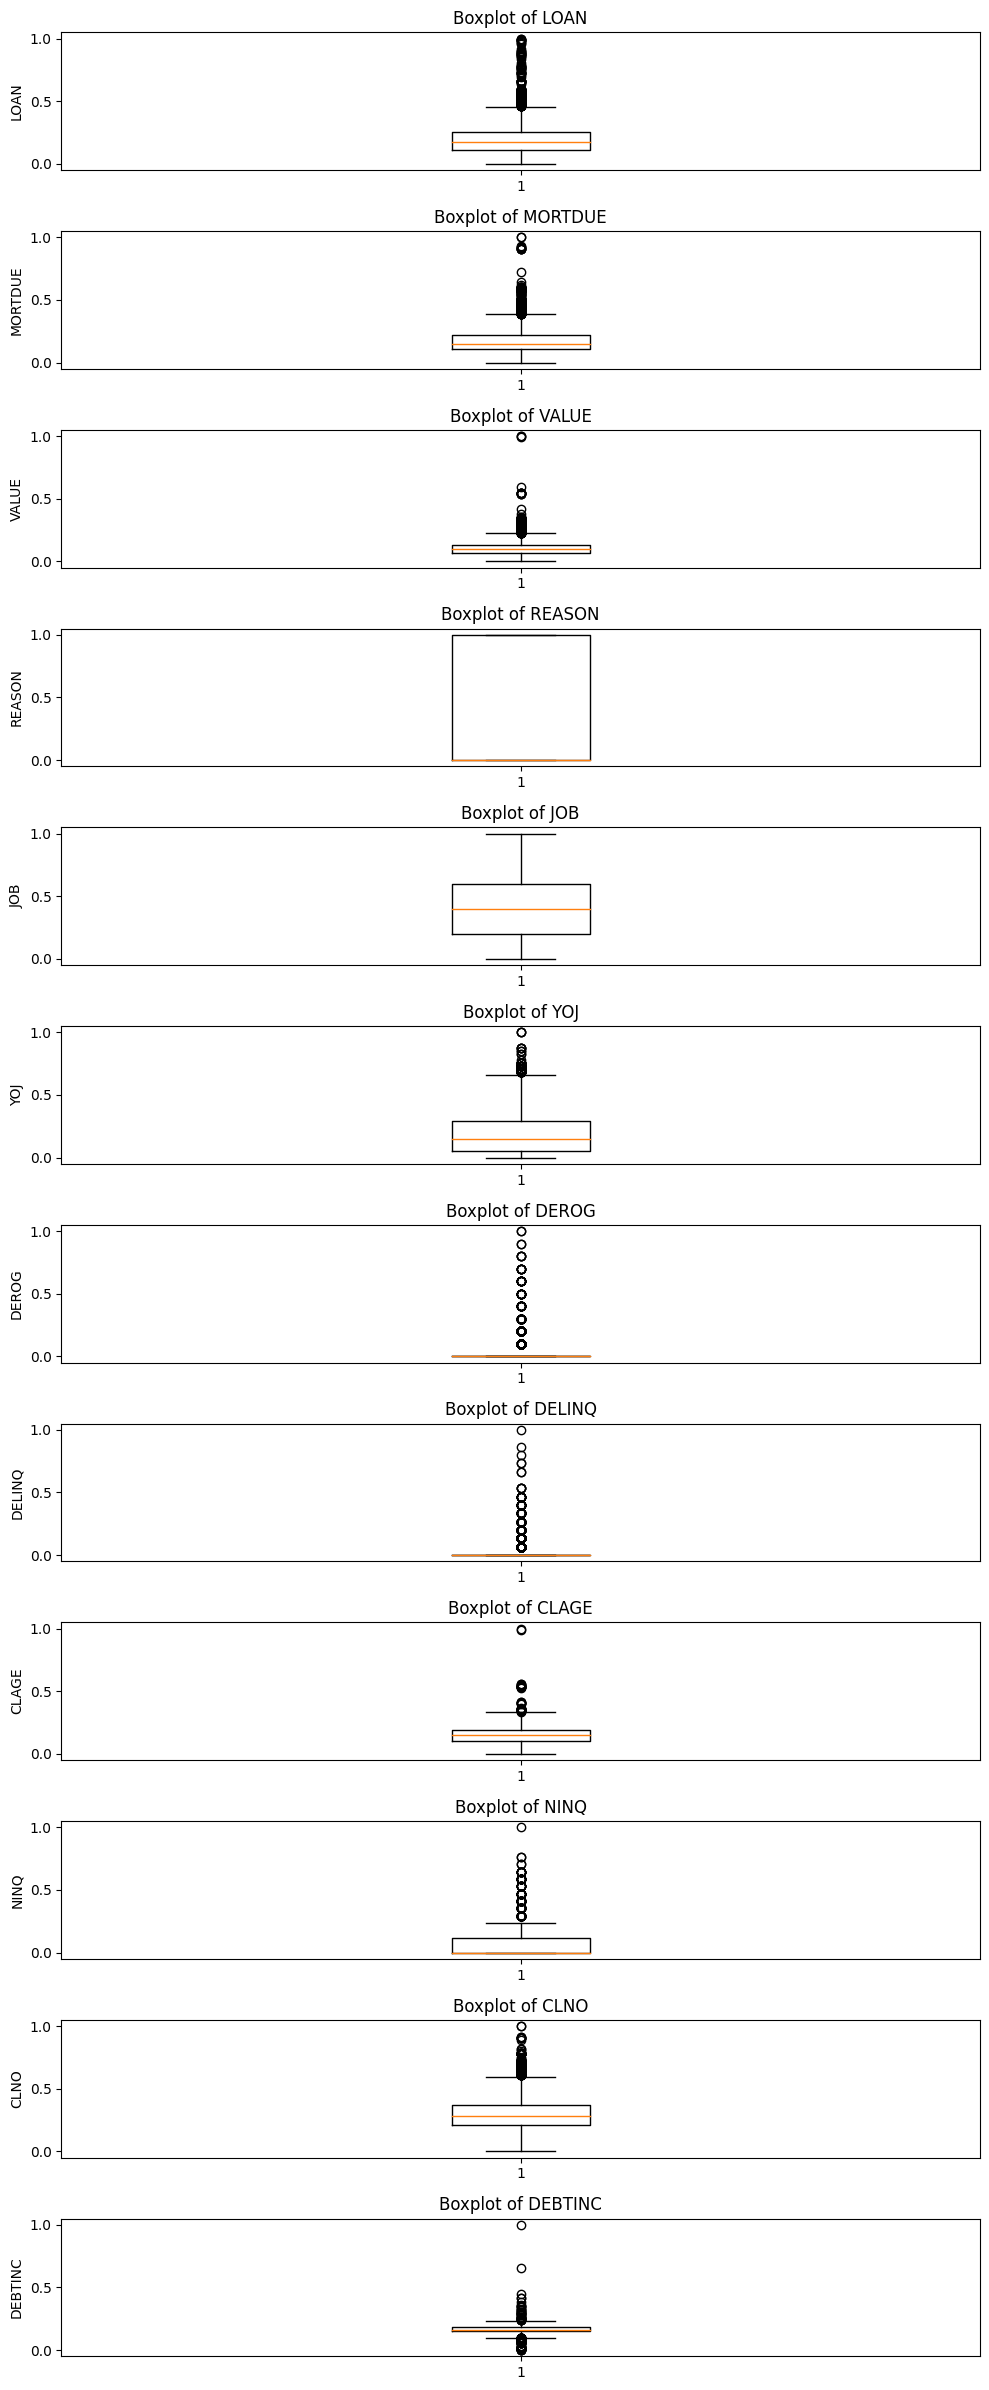

In [ ]:
show_outliers_boxplot(x_train_4)

In [28]:
def transform(x,y,is_dummy = True):
    data = pd.concat([x,y],axis=1)
    data.dropna(axis=0, how='any', inplace=True)
    data.drop('DEBTINC', axis=1, inplace=True)
    if is_dummy:
        data = pd.get_dummies(data, columns=['REASON','JOB'])
    y = data['BAD']
    x = data.drop(['BAD'],axis=1)
    return x,y

### BỘ DỮ LIỆU 5:
- Loại bỏ các hàng có dữ liệu thiếu và bỏ cột DEBINT do nhiều dữ liệu thiếu nhất
- Chuyển đổi các cột phân loại thành các cột dạng one-hot encoding
- Mã hóa nhãn biến phân loại về dạng số - one hot coding
- Loại bỏ outlier
- Chuẩn hóa dữ liệu bằng Standard

In [26]:
x_train_5, x_test_5, y_train_5, y_test_5 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [29]:
x_train_5,y_train_5 = transform(x_train_5,y_train_5)
x_test_5,y_test_5 = transform(x_test_5,y_test_5)

# LabelEncode
onehotcoding_label(x_train_5,5,True)
onehotcoding_label(x_test_5,5,False)
# Chuẩn hóa dạng Standard Scaler
x_train_5, y_train_5 = standardScaler_data(x_train_5, y_train_5, 5, True)
x_test_5, y_test_5 = standardScaler_data(x_test_5, y_test_5, 5, False)

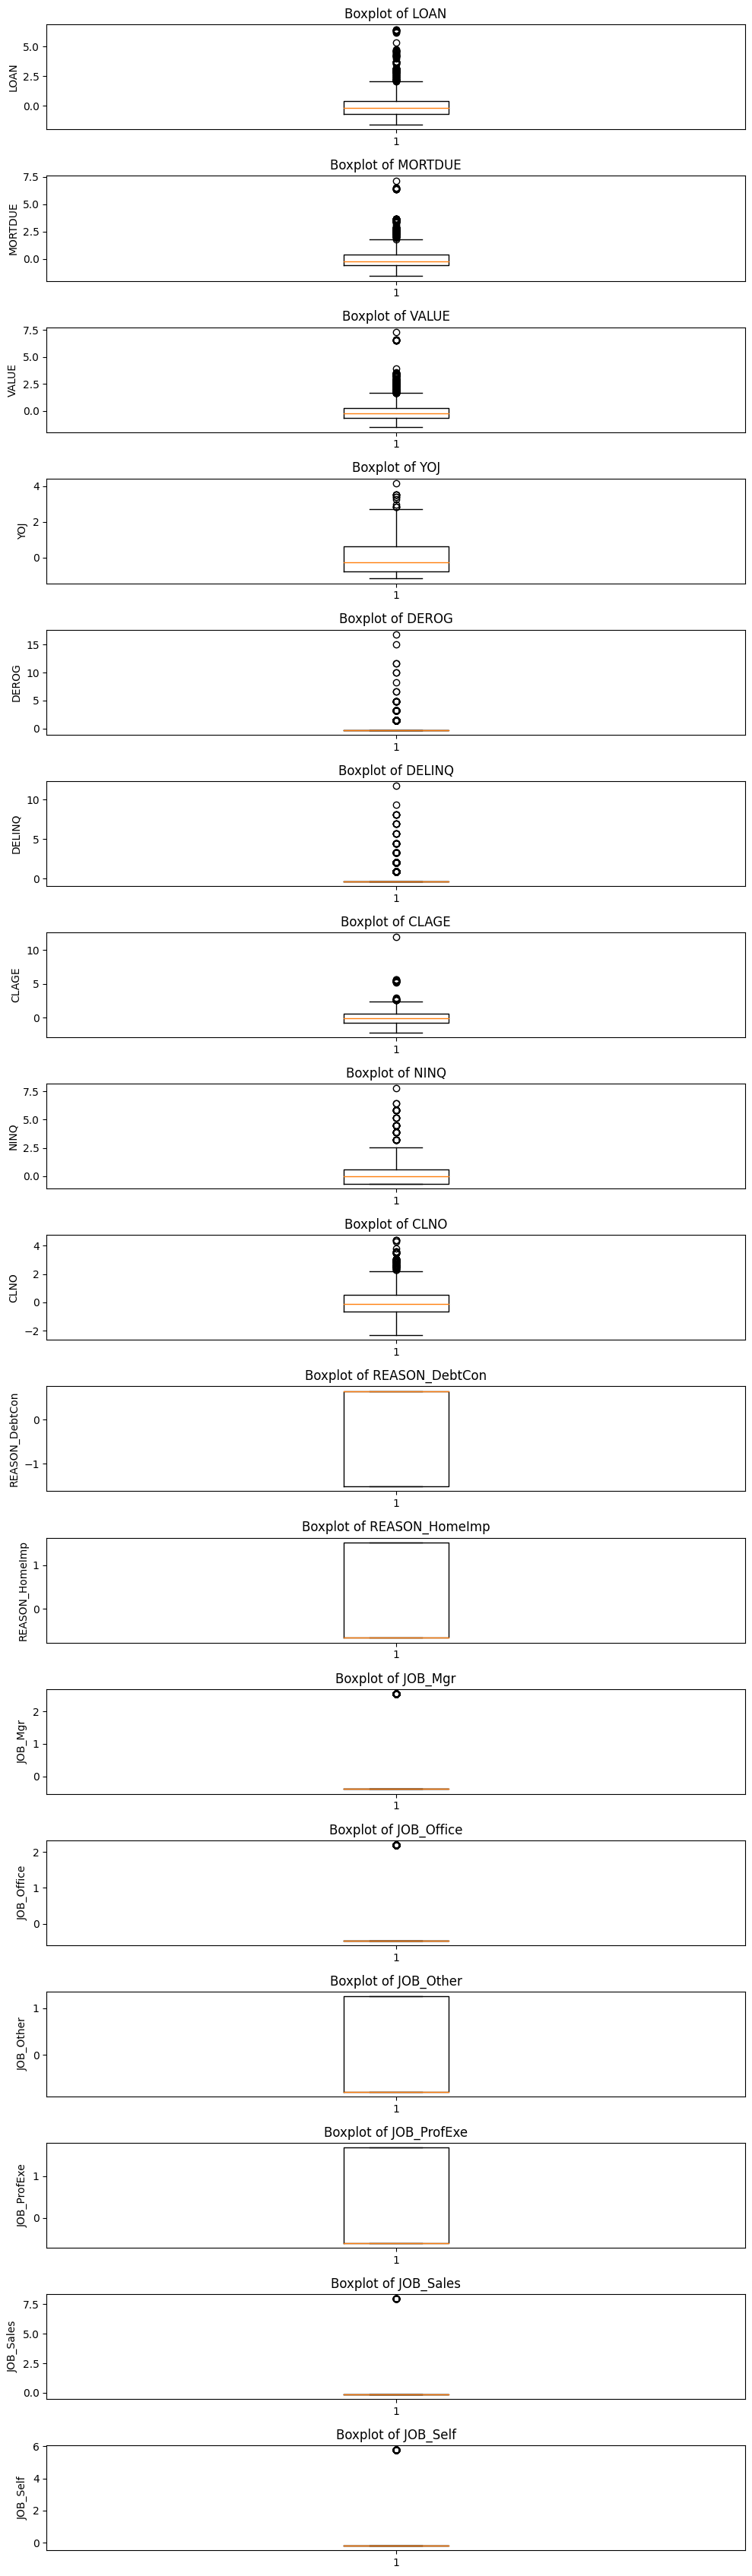

In [ ]:
show_outliers_boxplot(x_train_5)

### BỘ DỮ LIỆU 6:
- Loại bỏ các hàng có dữ liệu thiếu và bỏ cột DEBINT do nhiều dữ liệu thiếu nhất
- Mã hóa nhãn biến phân loại về dạng số - one hot coding
- Loại bỏ outlier
- Chuẩn hóa dữ liệu bằng Standard

In [ ]:
x_train_6, x_test_6, y_train_6, y_test_6 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
x_train_6,y_train_6 = transform(x_train_6,y_train_6,False)
x_test_6,y_test_6 = transform(x_test_6,y_test_6,False)

# LabelEncode
onehotcoding_label(x_train_6,6,True)
onehotcoding_label(x_test_6,6,False)
# Chuẩn hóa dạng Standard Scaler
x_train_6, y_train_6 = standardScaler_data(x_train_6, y_train_6, 6, True)
x_test_6, y_test_6 = standardScaler_data(x_test_6, y_test_6, 6, False)

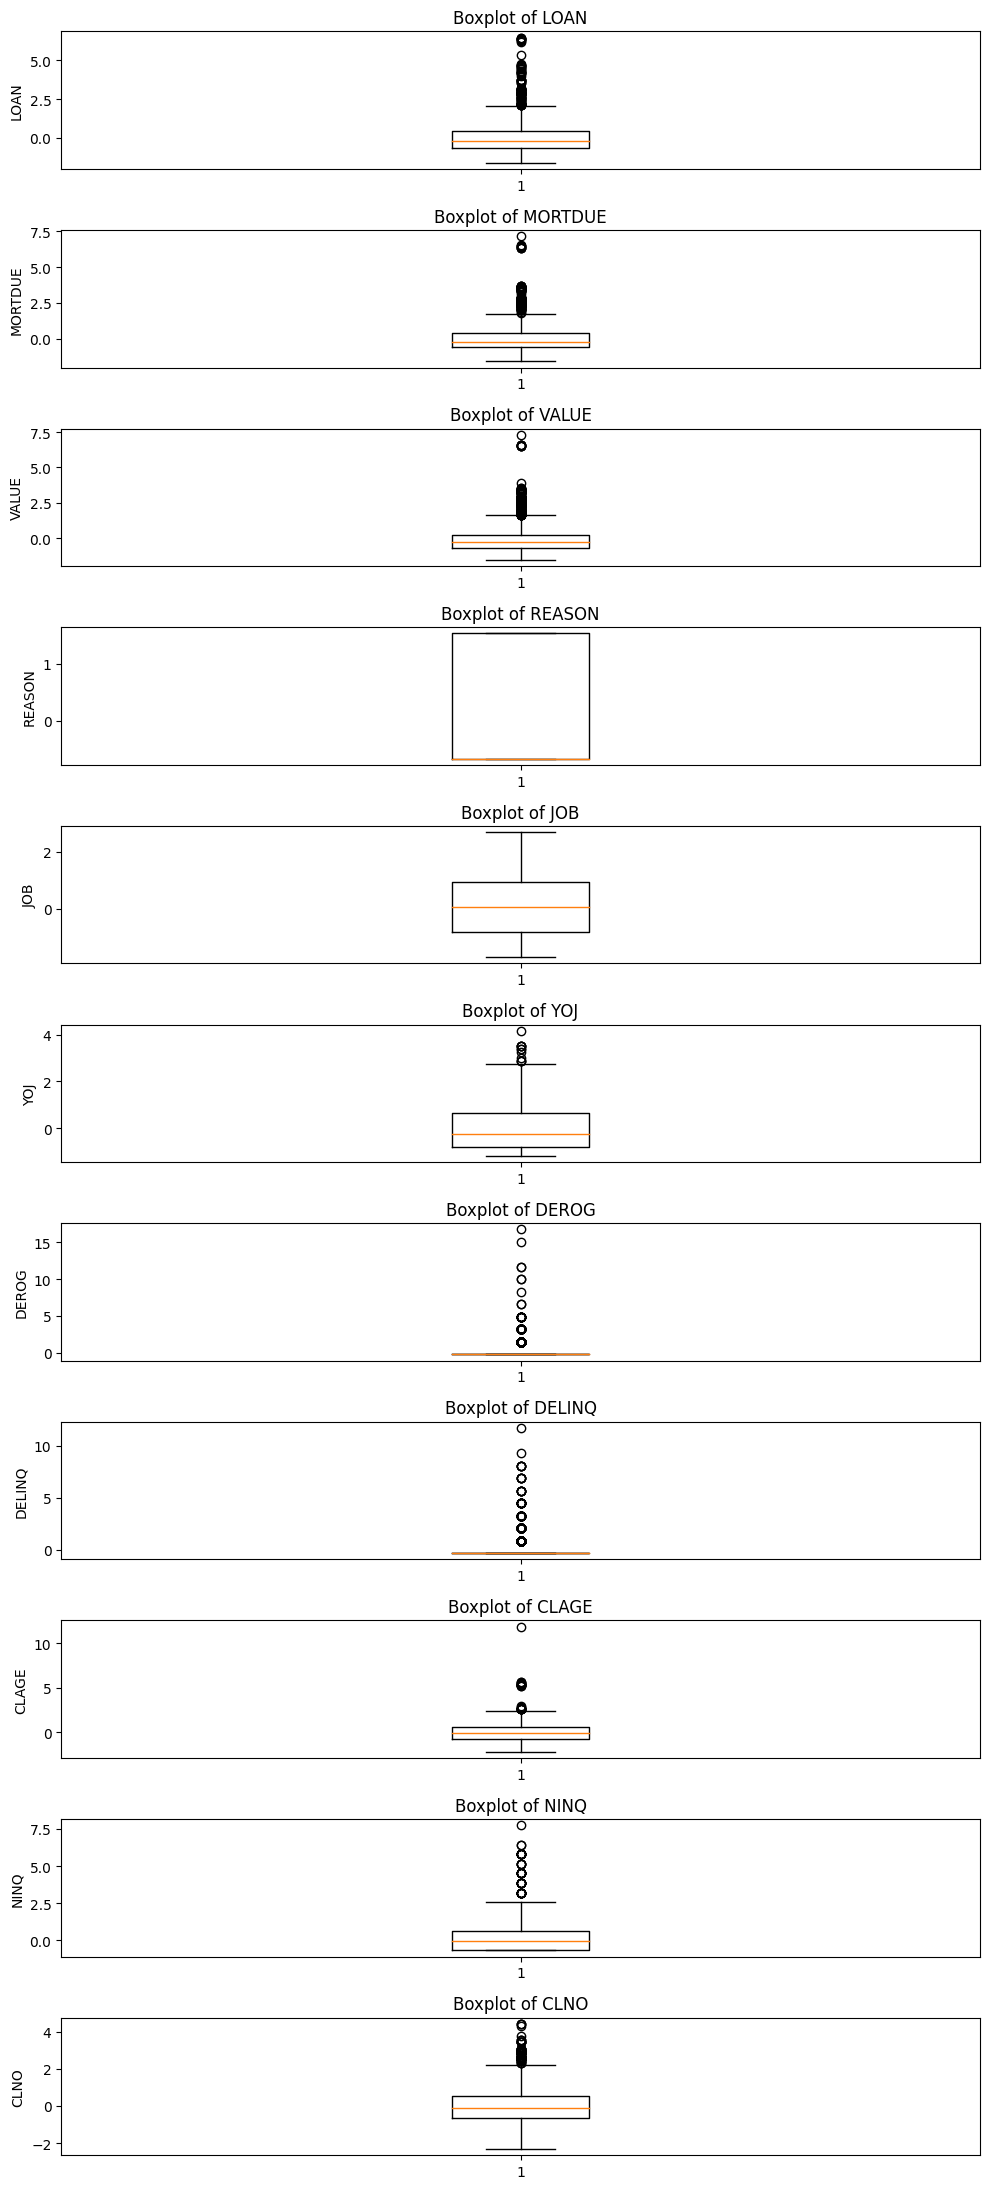

In [ ]:
show_outliers_boxplot(x_train_6)

# Tuning model - Hyperparameter

In [ ]:
# Danh sách các tập dữ liệu huấn luyện và kiểm tra
x_train_list = [x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6]
x_test_list = [x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6]
y_train_list = [y_train_1, y_train_2, y_train_3, y_train_4, y_train_5, y_train_6]
y_test_list = [y_test_1, y_test_2, y_test_3, y_test_4, y_test_5, y_test_6]

In [ ]:
# Logistic-Regression
# Thiết lập tham số grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Vòng lặp qua các tập dữ liệu
for i in range(6):
    # Triển khai Logistic Regression
    clasi_1 = LogisticRegression()

    # Grid Search CV
    grid_search = GridSearchCV(clasi_1, param_grid, cv=5, scoring='accuracy')

    # Huấn luyện mô hình
    grid_search.fit(x_train_list[i], y_train_list[i])

    # In ra kết quả tốt nhất
    print(f"Best parameters for model {i+1}: ", grid_search.best_params_)
    print(f"Best cross-validation accuracy for model {i+1}: ", grid_search.best_score_)

    # Đánh giá mô hình trên tập kiểm tra
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_list[i])
    print(f'Accuracy Score for model {i+1}: ', accuracy_score(y_test_list[i], y_pred))

Best parameters for model 1:  {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for model 1:  0.8513010882548985
Accuracy Score for model 1:  0.8498322147651006
Best parameters for model 2:  {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for model 2:  0.850816686135144
Accuracy Score for model 2:  0.7785234899328859
Best parameters for model 3:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for model 3:  0.8326331280893834
Accuracy Score for model 3:  0.8540268456375839
Best parameters for model 4:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for model 4:  0.8329822407887703
Accuracy Score for model 4:  0.9052013422818792


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for model 5:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for model 5:  0.9193024720843459
Accuracy Score for model 5:  0.9274074074074075
Best parameters for model 6:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy for model 6:  0.9193017798176569
Accuracy Score for model 6:  0.9274074074074075


Bộ dữ liệu 5 và 6 sử dụng bộ phân loại Logistic Regression cho kết quả độ chính xác cao nhất, trong đó bộ dữ liệu 6 có độ chính xác cross-validation cao nhất

# Tính điểm tín dụng cho tập test

In [30]:
def compute_credit_score(p):
    factor = 25 / np.log(2)
    offset = 600 - factor * np.log(50)
    val = (1-p) / p
    score = offset + factor * np.log(val)
    return round(score, 2)

## Với bộ dữ liệu 5

In [31]:
model = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'liblinear')
model.fit(x_train_5, y_train_5)
pred_prob_test = model.predict_proba(x_test_5)[:,1]
x_test_5["Proba"] = pred_prob_test
x_test_5["Score"] = x_test_5["Proba"].apply(lambda x: compute_credit_score(x))

In [32]:
x_test_5

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,Proba,Score
4798,0.555472,-0.787000,-0.672783,1.345853,-0.251741,-0.340826,0.040339,-0.016976,-0.033492,0.614452,-0.614452,-0.392232,2.230124,-0.757249,-0.637377,-0.12871,-0.174741,0.090140,542.29
3716,0.033452,-0.967095,-0.853847,0.664549,-0.251741,-0.340826,-0.750485,-0.016976,-0.593071,0.614452,-0.614452,-0.392232,-0.448406,1.320569,-0.637377,-0.12871,-0.174741,0.144519,523.04
1472,-0.782799,-0.488104,-0.780134,-0.561798,-0.251741,-0.340826,1.760593,-0.653592,-1.376482,0.614452,-0.614452,-0.392232,-0.448406,1.320569,-0.637377,-0.12871,-0.174741,0.100559,537.93
1050,-0.915677,-0.698948,-0.885908,-0.970581,-0.251741,1.036765,-1.199235,-0.653592,-0.369239,0.614452,-0.614452,-0.392232,-0.448406,1.320569,-0.637377,-0.12871,-0.174741,0.245550,499.39
2959,-0.289252,0.123995,0.463990,0.528288,-0.251741,-0.340826,1.579881,-0.653592,-0.369239,0.614452,-0.614452,-0.392232,-0.448406,-0.757249,1.568929,-0.12871,-0.174741,0.075339,549.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,-1.048555,-0.188200,-0.565452,-0.153016,-0.251741,-0.340826,-1.617335,-0.016976,0.078424,0.614452,-0.614452,-0.392232,-0.448406,-0.757249,1.568929,-0.12871,-0.174741,0.146641,522.43
4053,0.185312,-0.321556,-0.041785,0.528288,-0.251741,-0.340826,-0.455996,-0.653592,-0.928819,-1.627467,1.627467,-0.392232,2.230124,-0.757249,-0.637377,-0.12871,-0.174741,0.101732,537.46
2825,-0.327217,-0.566108,0.966099,1.345853,-0.251741,-0.340826,0.725591,-0.653592,0.638003,0.614452,-0.614452,-0.392232,-0.448406,-0.757249,1.568929,-0.12871,-0.174741,0.082359,545.85
1383,-0.811273,-0.587482,-0.796601,-0.016755,-0.251741,-0.340826,-1.051661,0.619639,1.309498,-1.627467,1.627467,-0.392232,-0.448406,1.320569,-0.637377,-0.12871,-0.174741,0.168327,516.52


In [33]:
max(x_test_5['Score'])

580.42

In [ ]:
min(x_test_5['Score'])

361.5

## Với bộ dữ liệu 6

In [ ]:
test = x_test.copy()
test.dropna(axis=0, how='any', inplace=True)
model = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'liblinear')
model.fit(x_train_6, y_train_6)
pred_prob_test = model.predict_proba(x_test_6)[:,1]
test["Proba"] = pred_prob_test
test["Score"] = test["Proba"].apply(lambda x: compute_credit_score(x))

In [ ]:
test

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,Proba,Score
4798,25100,41314.0,71357.0,DebtCon,Office,19.0,0.0,0.0,183.631428,1.0,22.0,33.665534,0.107708,535.16
3716,19600,33284.0,61824.0,DebtCon,Other,14.0,0.0,0.0,119.473073,1.0,17.0,37.784524,0.136265,525.51
1472,11000,54641.0,65705.0,DebtCon,Other,5.0,0.0,0.0,323.192928,0.0,10.0,33.299628,0.092641,541.20
1050,9600,45240.0,60136.0,DebtCon,Other,2.0,0.0,1.0,83.066751,0.0,19.0,38.454300,0.228112,502.87
2959,16200,81933.0,131208.0,DebtCon,ProfExe,13.0,0.0,0.0,308.532027,0.0,19.0,29.603684,0.086271,544.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,8200,68013.0,77008.0,DebtCon,ProfExe,8.0,0.0,0.0,49.146922,1.0,23.0,40.792590,0.169505,516.22
4053,21200,62067.0,104579.0,HomeImp,Office,13.0,0.0,0.0,143.364530,0.0,14.0,36.107667,0.119498,530.94
2825,15800,51163.0,157644.0,DebtCon,ProfExe,19.0,0.0,0.0,239.224789,0.0,28.0,20.747521,0.093434,540.86
1383,10700,50210.0,64838.0,HomeImp,Other,9.0,0.0,0.0,95.039168,2.0,34.0,40.396233,0.156734,519.60


In [ ]:
max(test['Score'])

575.27

In [ ]:
min(test['Score'])

359.3

In [ ]:
test.to_csv('G:\\APACHE_AIRFLOW\\data\\credit_score.csv')